# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Analysing Dataset

In [2]:
df1 = pd.read_csv("UCI_Credit_Card.csv")
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df1.duplicated().sum()

0

In [5]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df1.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df1['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [8]:
df1['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

# Data Cleaning

## Moving values 0,5,6 to 4(others) for education

In [9]:
unknown_edu = (df1['EDUCATION'] == 0) | (df1['EDUCATION'] == 5) | (df1['EDUCATION'] == 6)
df1.loc[unknown_edu, 'EDUCATION'] = 4
df1['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [10]:
df1['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

## Moving values 0 to 3(others) for marriage

In [11]:
unknown_mar = df1['MARRIAGE'] == 0
df1.loc[unknown_mar, 'MARRIAGE'] = 3
df1['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

## Changing name for convenience

In [12]:
df1['Defaulter'] =df1 ['default.payment.next.month']
df1.drop('default.payment.next.month',axis = 1,inplace=True)

In [13]:
df1['Defaulter'].value_counts()

Defaulter
0    23364
1     6636
Name: count, dtype: int64

# Exploratory Data Analysis

### Checking Frequency of Categorical Variables

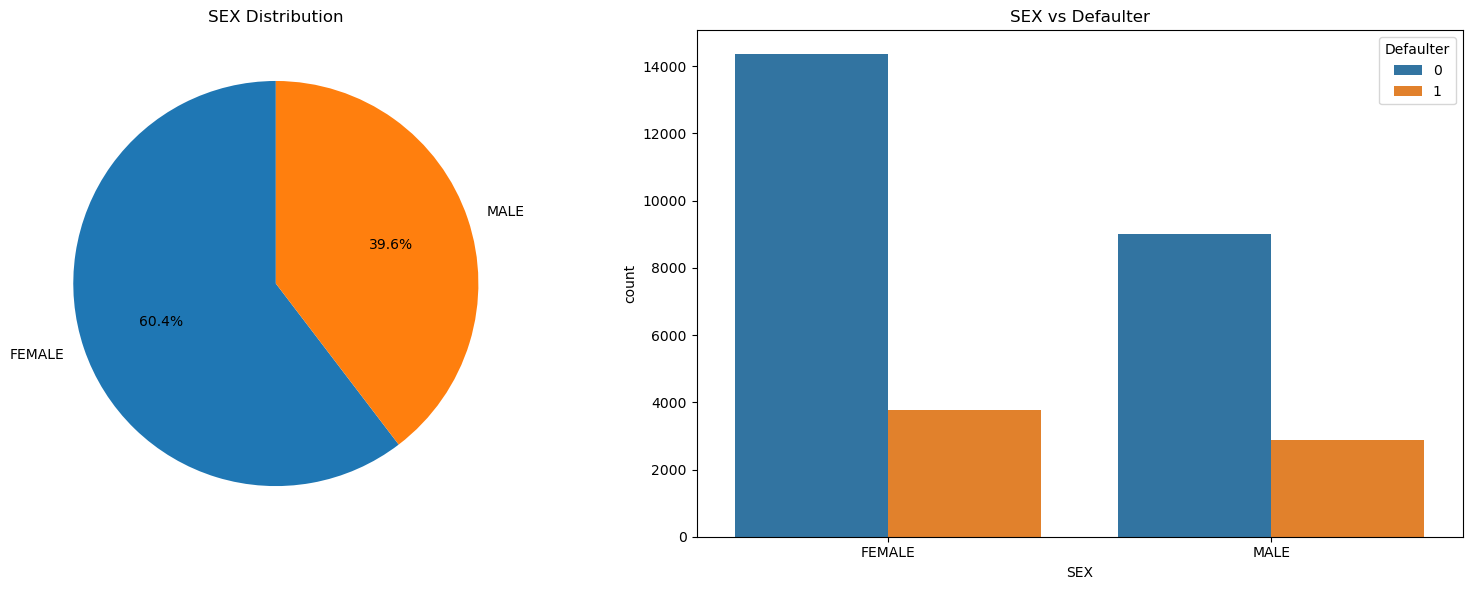

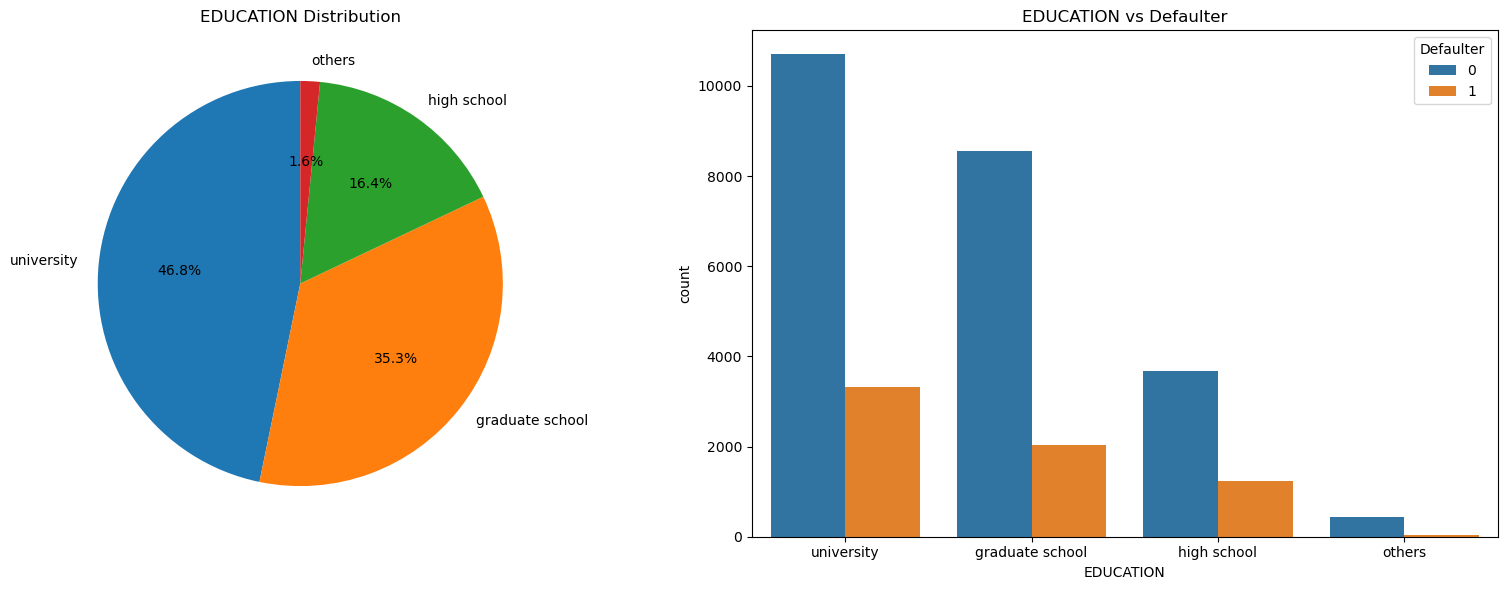

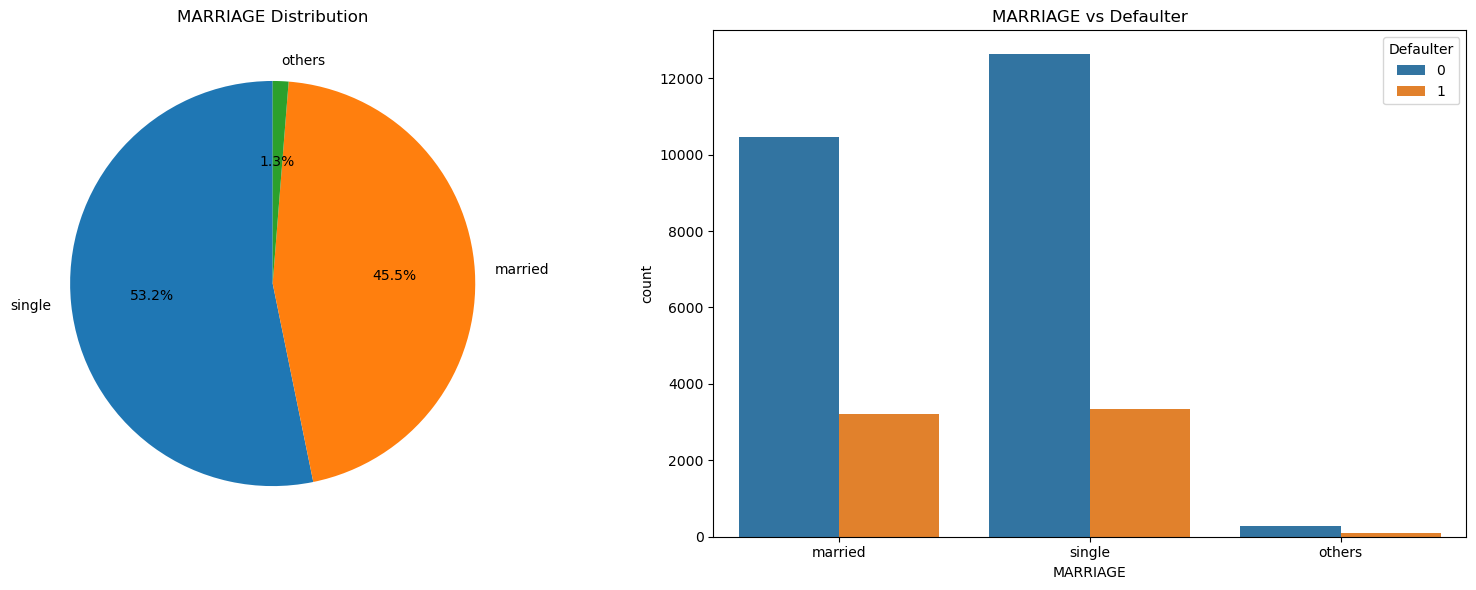

In [14]:
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df1[categorical].copy()
df_cat['Defaulter'] = df1['Defaulter']

# Replacing values with readable labels
replacement_dict = {
    'SEX': {1: 'MALE', 2: 'FEMALE'},
    'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},
    'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}
}
df_cat.replace(replacement_dict, inplace=True)

# Plotting
for col in categorical:
    fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
    
    # Pie chart
    df_cat[col].value_counts().plot(kind="pie", ax=axes[0], autopct='%1.1f%%', startangle=90, legend=False)
    axes[0].set_ylabel('')
    axes[0].set_title(f'{col} Distribution')
    
    # Count plot
    sns.countplot(x=col, hue='Defaulter', data=df_cat, ax=axes[1])
    axes[1].set_title(f'{col} vs Defaulter')
    
    plt.tight_layout()
    plt.show()

### Checking the Balance of the Data

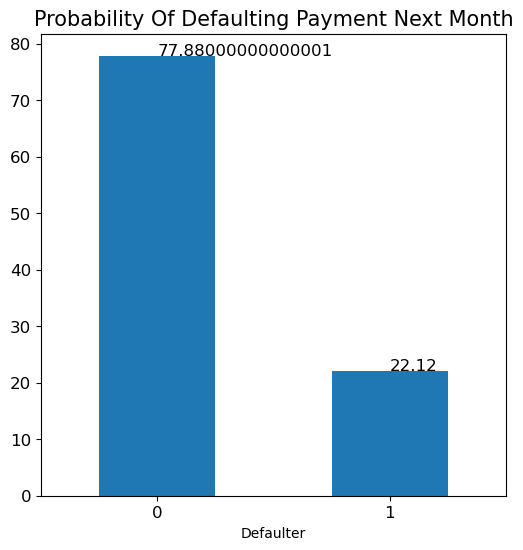

In [15]:
default = (df1.Defaulter.value_counts(normalize=True)*100)
default.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],default):
    plt.text(x,y,y,fontsize=12)
plt.show()

### Shape of limiting balance and age

C:\Users\spide\AppData\Local\Temp\ipykernel_29120\3844654414.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
C:\Users\spide\AppData\Local\Temp\ipykernel_29120\3844654414.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.LIMIT_BAL)
C:\Users\spide\AppData\Local\Temp\ipykernel_29120\3844654414.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

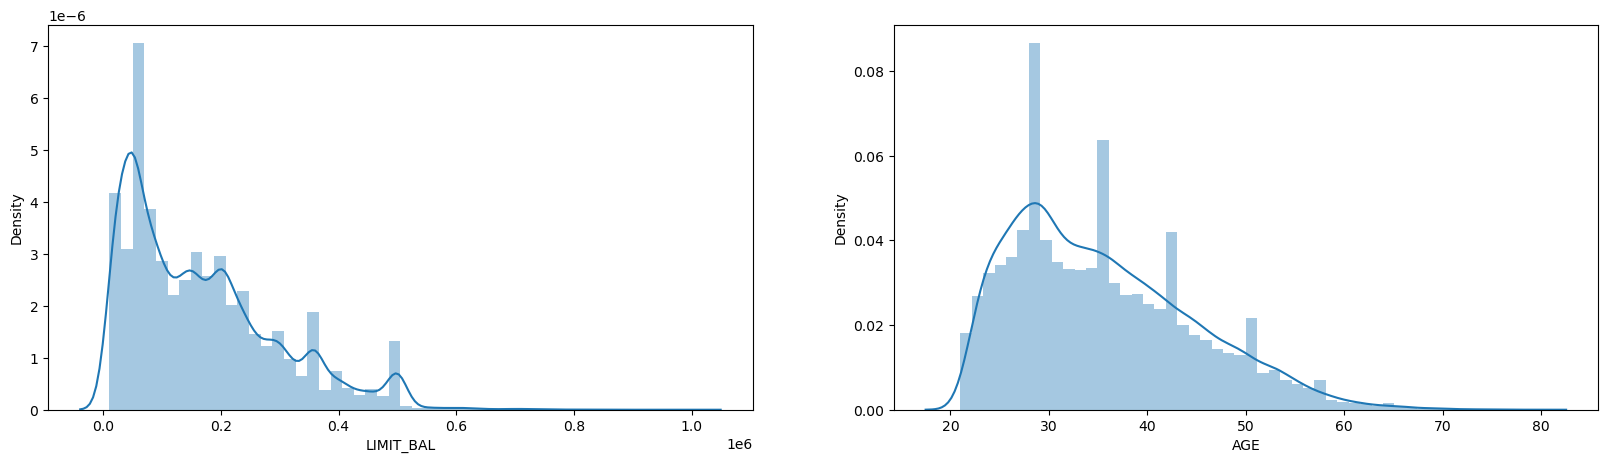

In [16]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df1.LIMIT_BAL)
plt.subplot(122)
sns.distplot(df1.AGE)
plt.show()

### Age Groups

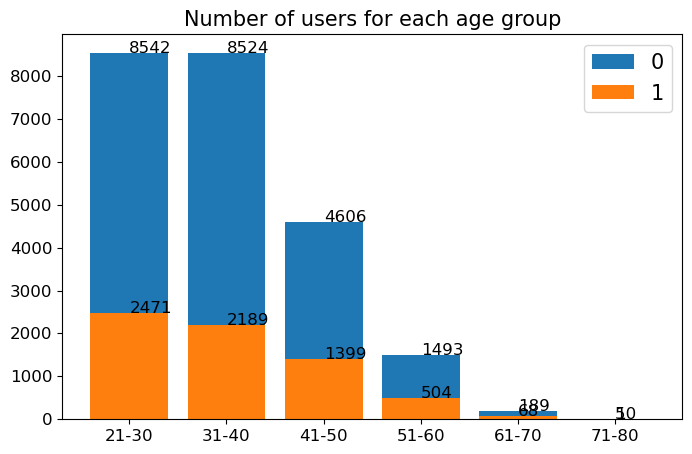

In [17]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df1['AGE_BIN'] = pd.cut(x=df1.AGE, bins=bins, labels=names, right=True)

age_cnt = df1.AGE_BIN.value_counts()
age_0 = (df1.AGE_BIN[df1['Defaulter'] == 0].value_counts())
age_1 = (df1.AGE_BIN[df1['Defaulter'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of users for each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [18]:
age_71_80_non_defaulter = age_0.get('71-80', 0)
age_71_80_non_defaulter

10

In [19]:
age_71_80_defaulter = age_1.get('71-80', 0)
age_71_80_defaulter

5

### Limit Balance and Default

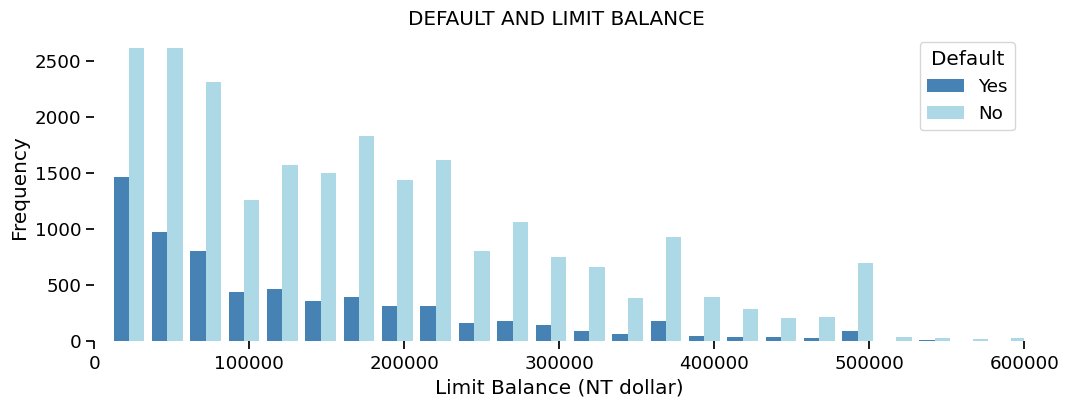

In [20]:
x1 = list(df1[df1['Defaulter'] == 1]['LIMIT_BAL'])
x2 = list(df1[df1['Defaulter'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)

plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('DEFAULT AND LIMIT BALANCE ')
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Shape of other numerical features

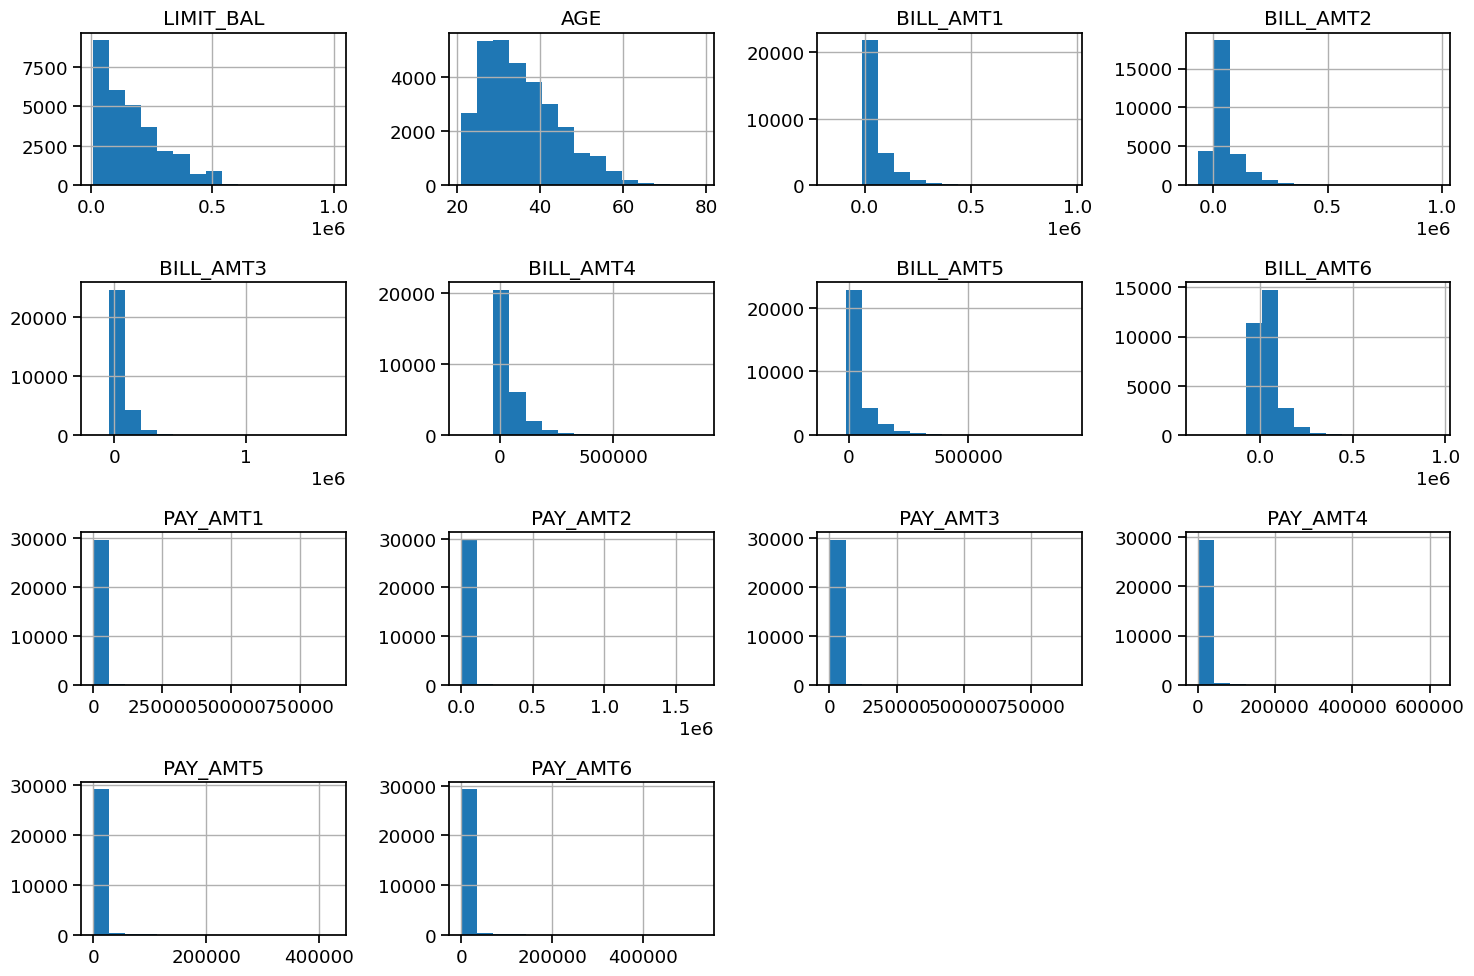

In [21]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df1[numeric_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Repayment Status for Defaulters and Non-Defaulters

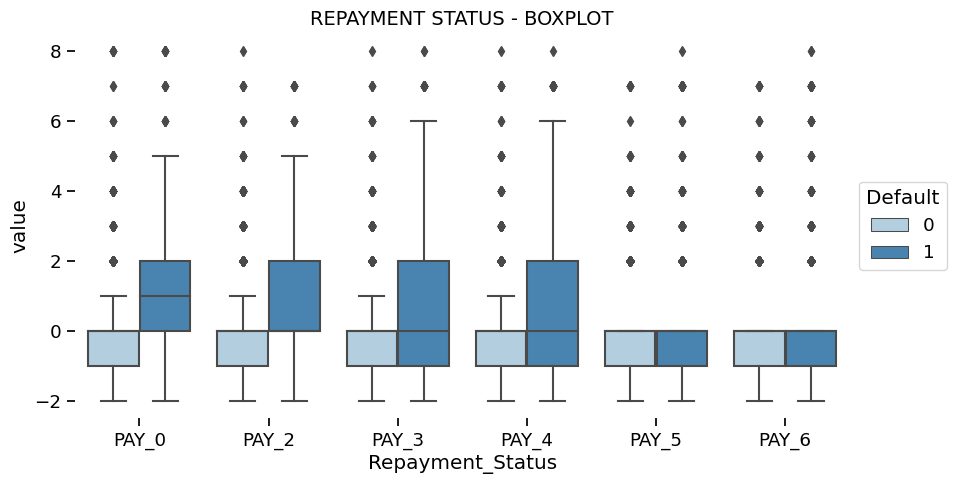

In [22]:
Repayment = df1[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

y = df1['Defaulter']
y = y.rename('Default')

Repayment = pd.concat([y, Repayment], axis=1)

Repayment = pd.melt(Repayment, id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title= 'Default', facecolor='white')
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200)
plt.show()

### Correlation Matrix

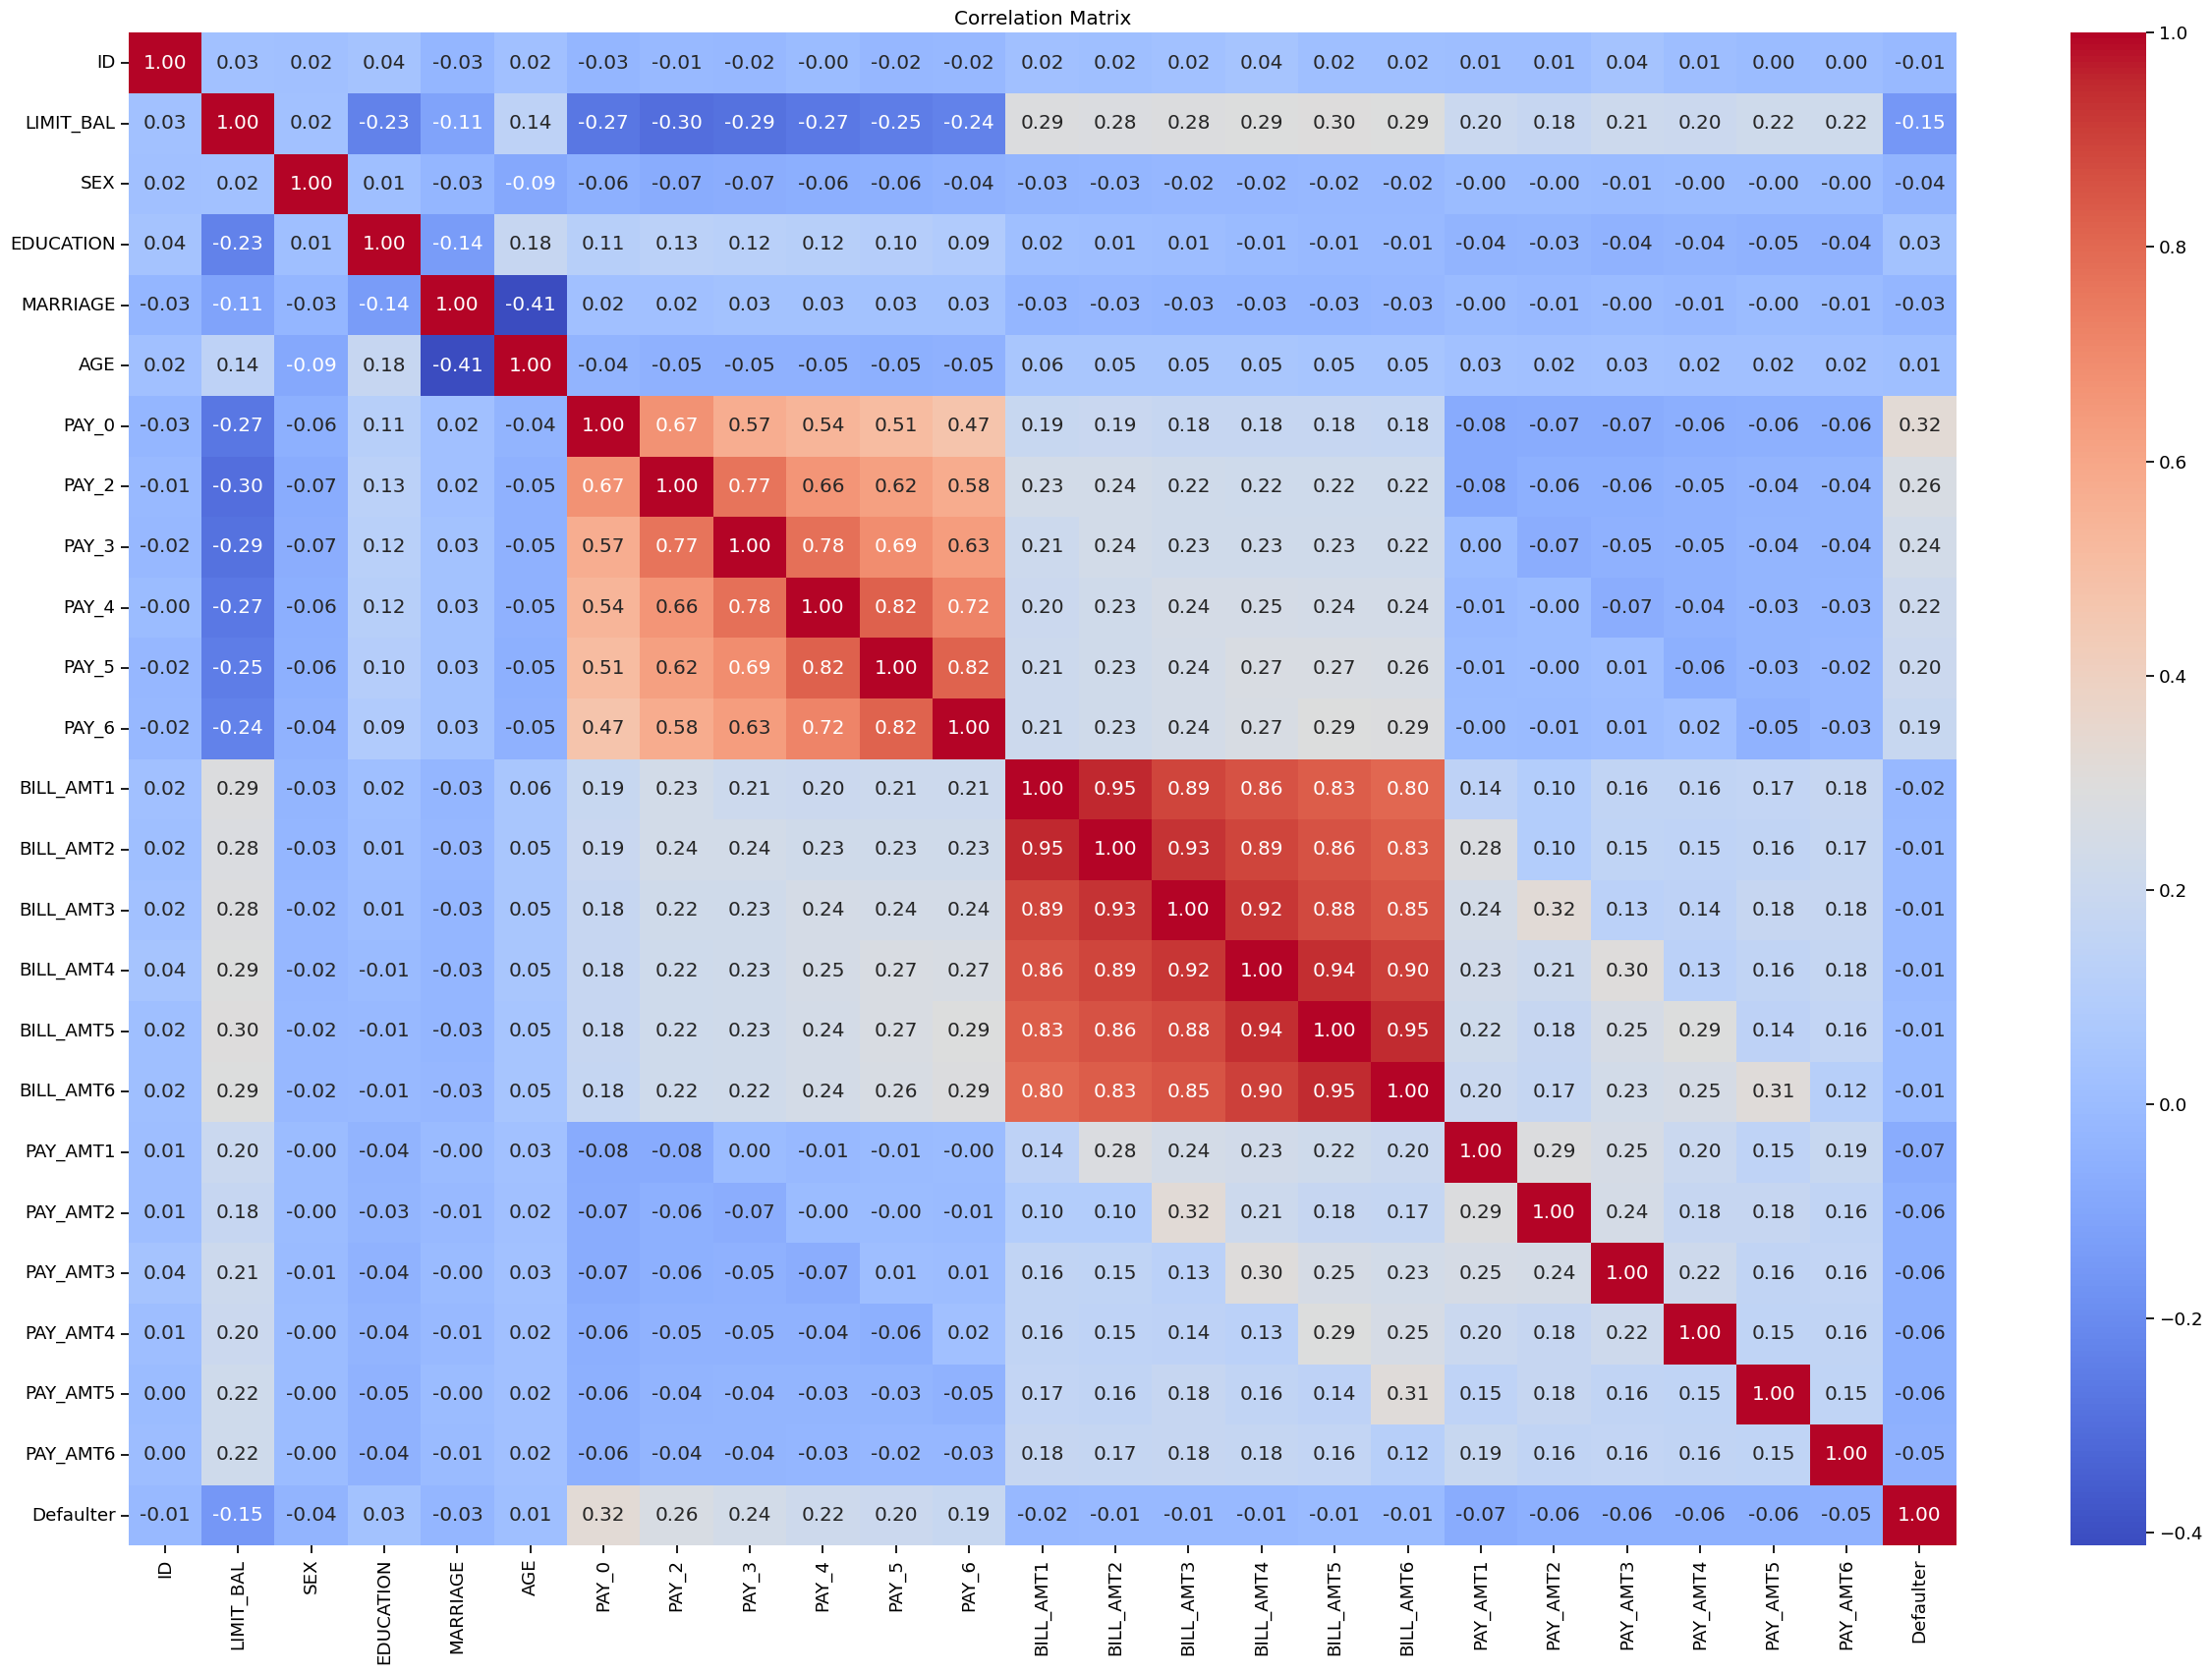

In [23]:
numeric_df1 = df1.select_dtypes(include=[float, int])

corr_matrix = numeric_df1.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Payment Amount and Bill Amount

C:\Users\spide\AppData\Local\Temp\ipykernel_29120\2920021927.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


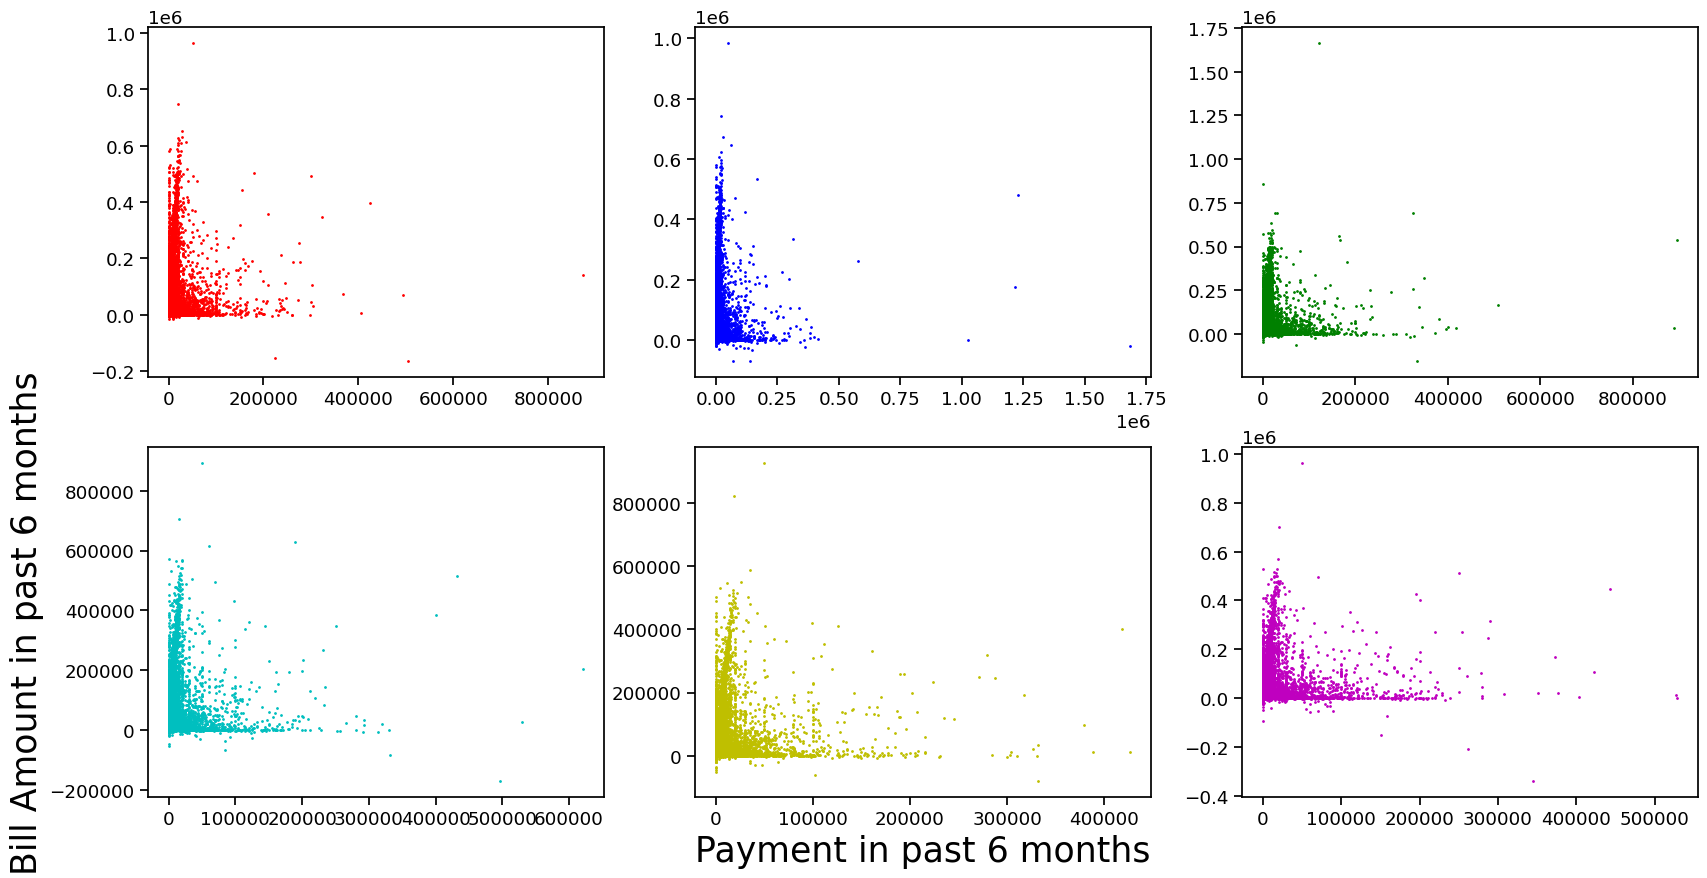

In [24]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df1.PAY_AMT1, y=df1.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df1.PAY_AMT2, y=df1.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df1.PAY_AMT3, y=df1.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df1.PAY_AMT4, y=df1.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df1.PAY_AMT5, y=df1.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df1.PAY_AMT6, y=df1.BILL_AMT6, c='m', s=1)

plt.show()

In [25]:
df2 = df1.drop(['ID', 'AGE_BIN'], axis=1)

In [26]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [27]:
X = df2.drop('Defaulter', axis=1).copy()
y = df2['Defaulter'].copy()

In [28]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [30]:
X1 = df2.drop('Defaulter', axis=1).copy()
y1 = df2['Defaulter'].copy()

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, random_state=42)

# Initial ML Models Analysis

Training Logistic Regression...


C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training SVM...


C:\Users\spide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training Random Forest...
Training XGBoost...
Training CatBoost...
Learning rate set to 0.037803
0:	learn: 0.6714365	total: 200ms	remaining: 3m 19s
1:	learn: 0.6514852	total: 234ms	remaining: 1m 56s
2:	learn: 0.6337567	total: 262ms	remaining: 1m 27s
3:	learn: 0.6177657	total: 290ms	remaining: 1m 12s
4:	learn: 0.6021721	total: 313ms	remaining: 1m 2s
5:	learn: 0.5880020	total: 333ms	remaining: 55.2s
6:	learn: 0.5755691	total: 348ms	remaining: 49.4s
7:	learn: 0.5643386	total: 363ms	remaining: 45s
8:	learn: 0.5537702	total: 378ms	remaining: 41.6s
9:	learn: 0.5436869	total: 392ms	remaining: 38.8s
10:	learn: 0.5346560	total: 407ms	remaining: 36.6s
11:	learn: 0.5262944	total: 418ms	remaining: 34.4s
12:	learn: 0.5186926	total: 433ms	remaining: 32.9s
13:	learn: 0.5117974	total: 448ms	remaining: 31.6s
14:	learn: 0.5056393	total: 462ms	remaining: 30.4s
15:	learn: 0.4999023	total: 476ms	remaining: 29.3s
16:	learn: 0.4945193	total: 490ms	remaining: 28.4s
17:	learn: 0.4895926	total: 506ms	remaining:

173:	learn: 0.4101978	total: 2.77s	remaining: 13.2s
174:	learn: 0.4101081	total: 2.78s	remaining: 13.1s
175:	learn: 0.4099840	total: 2.8s	remaining: 13.1s
176:	learn: 0.4098862	total: 2.81s	remaining: 13.1s
177:	learn: 0.4097735	total: 2.83s	remaining: 13.1s
178:	learn: 0.4096373	total: 2.84s	remaining: 13s
179:	learn: 0.4095201	total: 2.86s	remaining: 13s
180:	learn: 0.4094101	total: 2.87s	remaining: 13s
181:	learn: 0.4092775	total: 2.89s	remaining: 13s
182:	learn: 0.4091640	total: 2.9s	remaining: 12.9s
183:	learn: 0.4091051	total: 2.91s	remaining: 12.9s
184:	learn: 0.4090715	total: 2.93s	remaining: 12.9s
185:	learn: 0.4089501	total: 2.94s	remaining: 12.9s
186:	learn: 0.4088621	total: 2.96s	remaining: 12.8s
187:	learn: 0.4087478	total: 2.97s	remaining: 12.8s
188:	learn: 0.4086493	total: 2.98s	remaining: 12.8s
189:	learn: 0.4085887	total: 3s	remaining: 12.8s
190:	learn: 0.4084970	total: 3.01s	remaining: 12.8s
191:	learn: 0.4083514	total: 3.03s	remaining: 12.7s
192:	learn: 0.4083073	tot

335:	learn: 0.3937858	total: 5.1s	remaining: 10.1s
336:	learn: 0.3936027	total: 5.11s	remaining: 10.1s
337:	learn: 0.3935098	total: 5.13s	remaining: 10s
338:	learn: 0.3933992	total: 5.14s	remaining: 10s
339:	learn: 0.3933107	total: 5.15s	remaining: 10s
340:	learn: 0.3931572	total: 5.17s	remaining: 9.99s
341:	learn: 0.3930327	total: 5.18s	remaining: 9.97s
342:	learn: 0.3929482	total: 5.2s	remaining: 9.96s
343:	learn: 0.3928990	total: 5.21s	remaining: 9.94s
344:	learn: 0.3928205	total: 5.23s	remaining: 9.92s
345:	learn: 0.3927551	total: 5.24s	remaining: 9.91s
346:	learn: 0.3926721	total: 5.25s	remaining: 9.89s
347:	learn: 0.3925579	total: 5.27s	remaining: 9.87s
348:	learn: 0.3924969	total: 5.28s	remaining: 9.86s
349:	learn: 0.3923842	total: 5.3s	remaining: 9.84s
350:	learn: 0.3923161	total: 5.31s	remaining: 9.82s
351:	learn: 0.3922432	total: 5.33s	remaining: 9.8s
352:	learn: 0.3921779	total: 5.34s	remaining: 9.79s
353:	learn: 0.3920750	total: 5.36s	remaining: 9.77s
354:	learn: 0.3919377	

494:	learn: 0.3781656	total: 7.38s	remaining: 7.53s
495:	learn: 0.3780870	total: 7.39s	remaining: 7.51s
496:	learn: 0.3779987	total: 7.41s	remaining: 7.5s
497:	learn: 0.3779348	total: 7.42s	remaining: 7.48s
498:	learn: 0.3778600	total: 7.44s	remaining: 7.47s
499:	learn: 0.3777451	total: 7.45s	remaining: 7.45s
500:	learn: 0.3776417	total: 7.47s	remaining: 7.44s
501:	learn: 0.3775479	total: 7.48s	remaining: 7.42s
502:	learn: 0.3774725	total: 7.5s	remaining: 7.41s
503:	learn: 0.3773309	total: 7.51s	remaining: 7.39s
504:	learn: 0.3771974	total: 7.53s	remaining: 7.38s
505:	learn: 0.3771242	total: 7.54s	remaining: 7.36s
506:	learn: 0.3769912	total: 7.55s	remaining: 7.34s
507:	learn: 0.3769364	total: 7.57s	remaining: 7.33s
508:	learn: 0.3768295	total: 7.58s	remaining: 7.32s
509:	learn: 0.3767188	total: 7.6s	remaining: 7.3s
510:	learn: 0.3766390	total: 7.61s	remaining: 7.28s
511:	learn: 0.3765465	total: 7.62s	remaining: 7.27s
512:	learn: 0.3764631	total: 7.64s	remaining: 7.25s
513:	learn: 0.37

657:	learn: 0.3638776	total: 9.72s	remaining: 5.05s
658:	learn: 0.3638046	total: 9.74s	remaining: 5.04s
659:	learn: 0.3637771	total: 9.75s	remaining: 5.02s
660:	learn: 0.3636795	total: 9.77s	remaining: 5.01s
661:	learn: 0.3636269	total: 9.78s	remaining: 4.99s
662:	learn: 0.3635206	total: 9.79s	remaining: 4.98s
663:	learn: 0.3634186	total: 9.81s	remaining: 4.96s
664:	learn: 0.3633446	total: 9.82s	remaining: 4.95s
665:	learn: 0.3632593	total: 9.84s	remaining: 4.93s
666:	learn: 0.3632035	total: 9.85s	remaining: 4.92s
667:	learn: 0.3630961	total: 9.86s	remaining: 4.9s
668:	learn: 0.3630110	total: 9.88s	remaining: 4.89s
669:	learn: 0.3629454	total: 9.89s	remaining: 4.87s
670:	learn: 0.3628425	total: 9.91s	remaining: 4.86s
671:	learn: 0.3627309	total: 9.92s	remaining: 4.84s
672:	learn: 0.3626429	total: 9.94s	remaining: 4.83s
673:	learn: 0.3625978	total: 9.95s	remaining: 4.81s
674:	learn: 0.3624647	total: 9.97s	remaining: 4.8s
675:	learn: 0.3623838	total: 9.98s	remaining: 4.78s
676:	learn: 0.

818:	learn: 0.3508701	total: 12s	remaining: 2.66s
819:	learn: 0.3508033	total: 12s	remaining: 2.64s
820:	learn: 0.3507118	total: 12.1s	remaining: 2.63s
821:	learn: 0.3506652	total: 12.1s	remaining: 2.61s
822:	learn: 0.3505961	total: 12.1s	remaining: 2.6s
823:	learn: 0.3505039	total: 12.1s	remaining: 2.58s
824:	learn: 0.3504584	total: 12.1s	remaining: 2.57s
825:	learn: 0.3504019	total: 12.1s	remaining: 2.55s
826:	learn: 0.3503325	total: 12.1s	remaining: 2.54s
827:	learn: 0.3502561	total: 12.2s	remaining: 2.52s
828:	learn: 0.3501743	total: 12.2s	remaining: 2.51s
829:	learn: 0.3500860	total: 12.2s	remaining: 2.5s
830:	learn: 0.3499541	total: 12.2s	remaining: 2.48s
831:	learn: 0.3498890	total: 12.2s	remaining: 2.47s
832:	learn: 0.3498095	total: 12.2s	remaining: 2.45s
833:	learn: 0.3496977	total: 12.2s	remaining: 2.44s
834:	learn: 0.3496606	total: 12.3s	remaining: 2.42s
835:	learn: 0.3496361	total: 12.3s	remaining: 2.41s
836:	learn: 0.3495488	total: 12.3s	remaining: 2.39s
837:	learn: 0.3494

980:	learn: 0.3396551	total: 14.3s	remaining: 278ms
981:	learn: 0.3395994	total: 14.4s	remaining: 263ms
982:	learn: 0.3395215	total: 14.4s	remaining: 249ms
983:	learn: 0.3394688	total: 14.4s	remaining: 234ms
984:	learn: 0.3393667	total: 14.4s	remaining: 219ms
985:	learn: 0.3392769	total: 14.4s	remaining: 205ms
986:	learn: 0.3391987	total: 14.4s	remaining: 190ms
987:	learn: 0.3390973	total: 14.4s	remaining: 175ms
988:	learn: 0.3390311	total: 14.5s	remaining: 161ms
989:	learn: 0.3390051	total: 14.5s	remaining: 146ms
990:	learn: 0.3389182	total: 14.5s	remaining: 132ms
991:	learn: 0.3388110	total: 14.5s	remaining: 117ms
992:	learn: 0.3387364	total: 14.5s	remaining: 102ms
993:	learn: 0.3386471	total: 14.5s	remaining: 87.7ms
994:	learn: 0.3385890	total: 14.5s	remaining: 73.1ms
995:	learn: 0.3385472	total: 14.6s	remaining: 58.5ms
996:	learn: 0.3384692	total: 14.6s	remaining: 43.9ms
997:	learn: 0.3384259	total: 14.6s	remaining: 29.2ms
998:	learn: 0.3383402	total: 14.6s	remaining: 14.6ms
999:	l

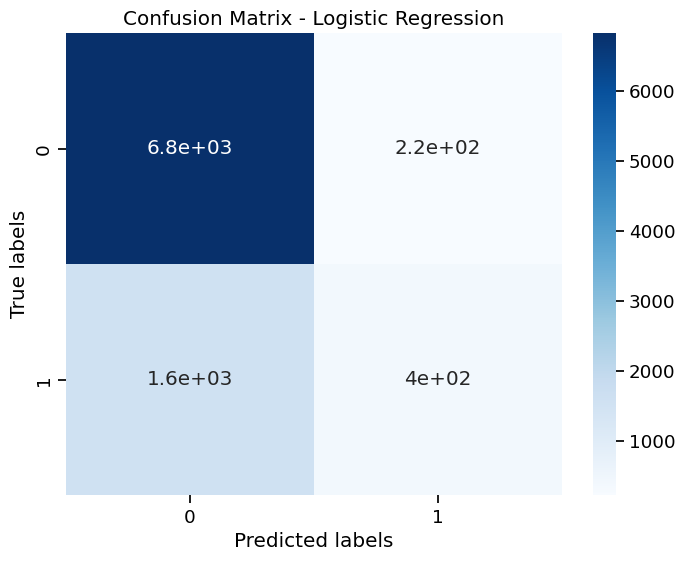


**SVM**
Accuracy: 0.782
Recall: 0.000
F1-score: 0.000
ROC AUC: 0.573
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



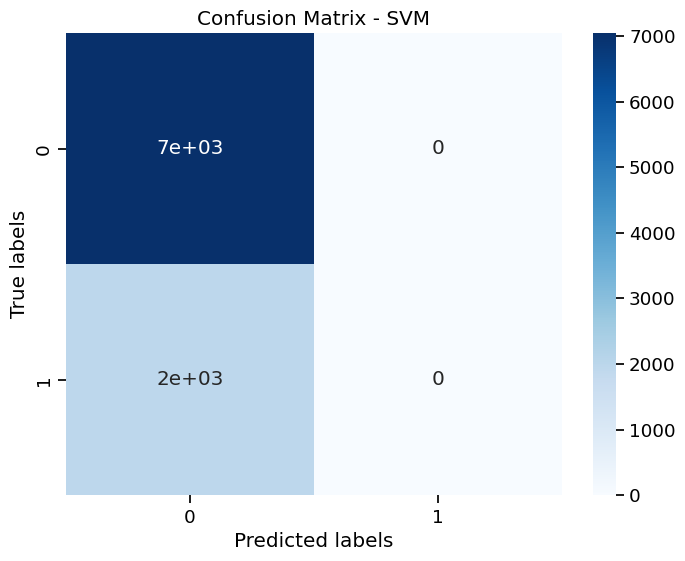


**Random Forest**
Accuracy: 0.815
Recall: 0.365
F1-score: 0.462
ROC AUC: 0.758
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.81      0.80      9000



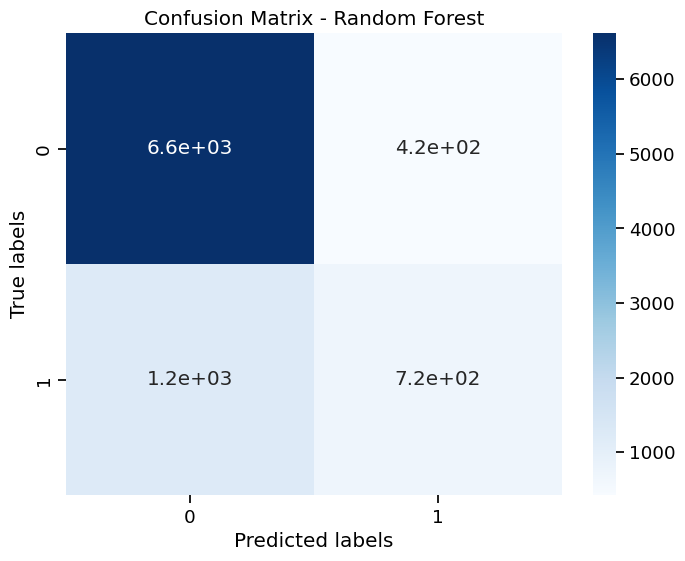


**XGBoost**
Accuracy: 0.809
Recall: 0.359
F1-score: 0.450
ROC AUC: 0.764
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7040
           1       0.60      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



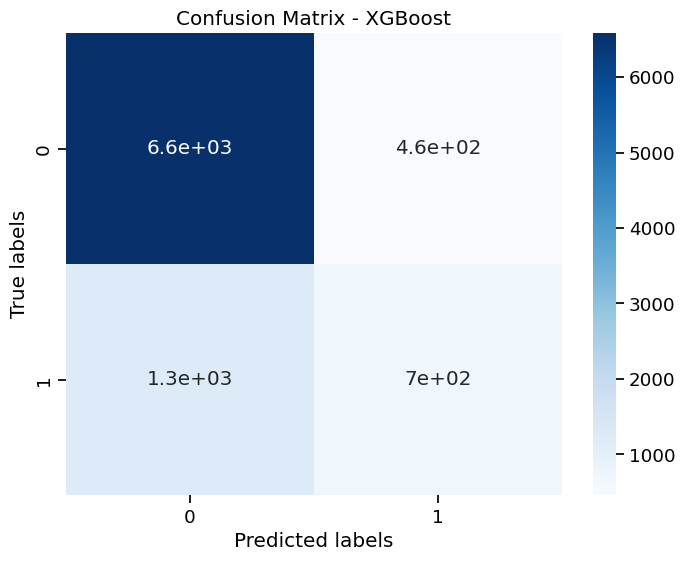


**CatBoost**
Accuracy: 0.819
Recall: 0.364
F1-score: 0.467
ROC AUC: 0.776
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



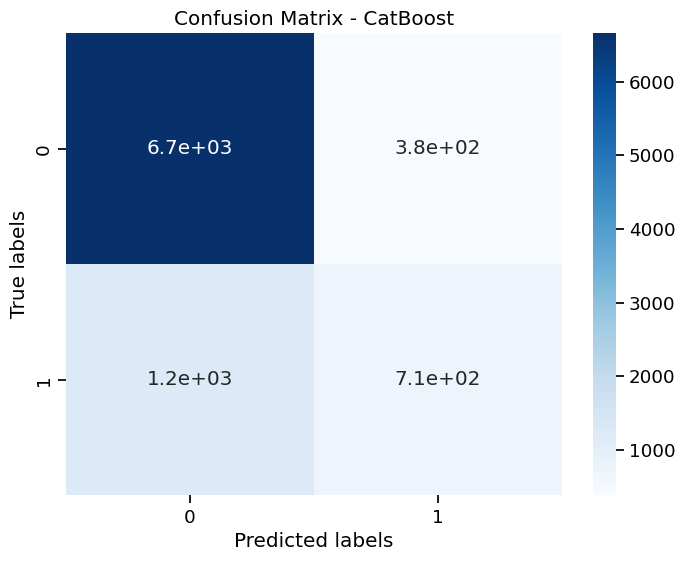


**LightGBM**
Accuracy: 0.821
Recall: 0.361
F1-score: 0.468
ROC AUC: 0.777
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



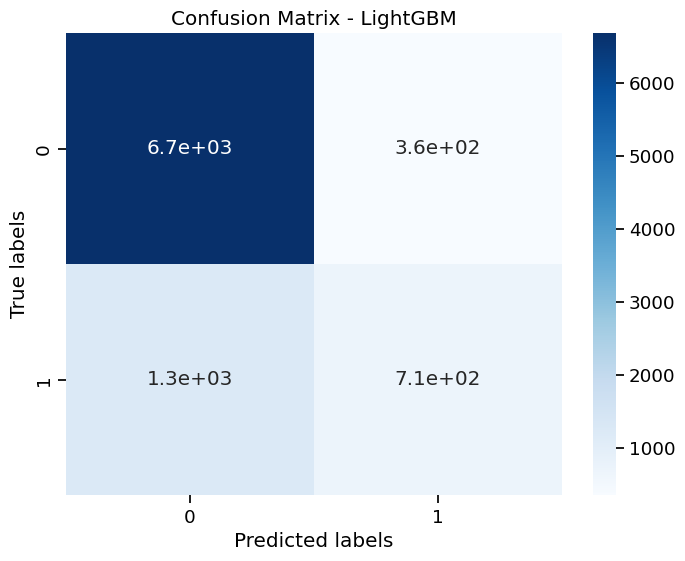

In [32]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(objective='binary', random_state=42)
    
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X1_train, y1_train)
    y_pred = model.predict(X1_test)
    y_pred_proba = model.predict_proba(X1_test)[:, 1]
    
    accuracy = accuracy_score(y1_test, y_pred)
    recall = recall_score(y1_test, y_pred)
    f1 = f1_score(y1_test, y_pred)
    roc_auc = roc_auc_score(y1_test, y_pred_proba)
    report = classification_report(y1_test, y_pred)
    conf_mat = confusion_matrix(y1_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc,
        'Classification Report': report,
        'Confusion Matrix': conf_mat
    }

for name, result in results.items():
    print(f"**{name}**")
    print(f"Accuracy: {result['Accuracy']:.3f}")
    print(f"Recall: {result['Recall']:.3f}")
    print(f"F1-score: {result['F1-score']:.3f}")
    print(f"ROC AUC: {result['ROC AUC']:.3f}")
    print("Classification Report:\n", result['Classification Report'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(result['Confusion Matrix']), annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print()

# Hyperparameter Tuning

### Logistic Regression

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\spide\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
87 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\spide\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\spide\anaconda3\Lib\site-packages\

C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best Hyperparameters (Logistic Regression): {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 400, 'l1_ratio': 0.2222222222222222, 'C': 0.03359818286283781}
Best ROC-AUC Score (Logistic Regression): 0.7228791445234842


C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy (Logistic Regression): 0.809
ROC-AUC Score (Logistic Regression): 0.7231972547541744
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



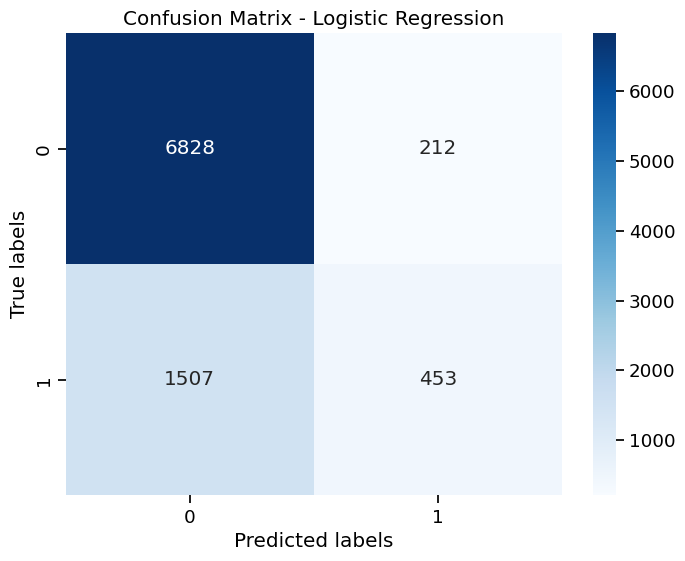

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge',

Average 5-Fold CV ROC-AUC Score (Logistic Regression): 0.7218
Standard Deviation (Logistic Regression): 0.0148


In [33]:
# Define the parameter distribution for logistic regression
param_dist_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'l1_ratio': np.linspace(0, 1, 10)  # Only used for 'elasticnet'
}

# Initialize the logistic regression model
lr = LogisticRegression(random_state=42)

# Initialize the random search
random_search_lr = RandomizedSearchCV(
    lr, 
    param_distributions=param_dist_lr, 
    n_iter=50, 
    cv=3, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

# Fit the random search model
random_search_lr.fit(X1_train, y1_train)

# Print the best hyperparameters and best ROC-AUC score
print("Best Hyperparameters (Logistic Regression):", random_search_lr.best_params_)
print("Best ROC-AUC Score (Logistic Regression):", random_search_lr.best_score_)

# Train the logistic regression model with the best hyperparameters
best_params = random_search_lr.best_params_.copy()
best_params.pop('max_iter', None)  # Remove max_iter if it exists
best_lr = LogisticRegression(**best_params, random_state=42, max_iter=1000)
best_lr.fit(X1_train, y1_train)

# Make predictions
y_pred_lr = best_lr.predict(X1_test)
y_pred_proba_lr = best_lr.predict_proba(X1_test)[:, 1]

# Print evaluation metrics
print("Accuracy (Logistic Regression):", accuracy_score(y1_test, y_pred_lr))
print("ROC-AUC Score (Logistic Regression):", roc_auc_score(y1_test, y_pred_proba_lr))
print("Classification Report (Logistic Regression):\n", classification_report(y1_test, y_pred_lr))

# Plot confusion matrix
conf_mat_lr = confusion_matrix(y1_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_lr), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Calculate cross-validated ROC-AUC scores
cv_scores_lr = cross_val_score(best_lr, X1, y1, cv=5, scoring='roc_auc')

# Print average and standard deviation of cross-validated ROC-AUC scores
print("Average 5-Fold CV ROC-AUC Score (Logistic Regression):", round(np.mean(cv_scores_lr), 4))
print("Standard Deviation (Logistic Regression):", round(np.std(cv_scores_lr), 4))

Top 10 Feature Importances for Logistic Regression Best Model:
      Feature  Importance
5       PAY_0    0.569892
3    MARRIAGE    0.165868
1         SEX    0.106077
6       PAY_2    0.097113
2   EDUCATION    0.093717
7       PAY_3    0.074938
8       PAY_4    0.033975
10      PAY_6    0.023744
9       PAY_5    0.012627
4         AGE    0.008005


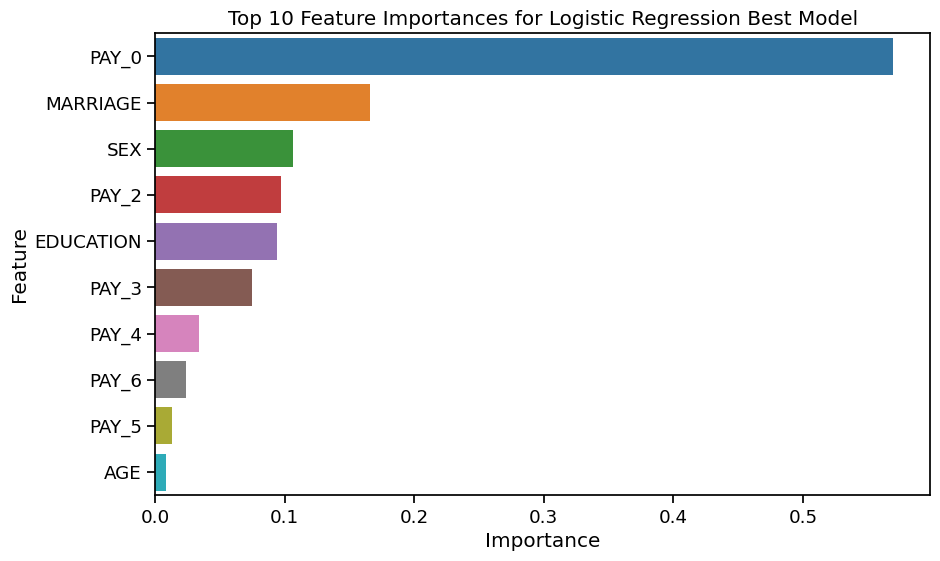

Top 10 Features (Logistic Regression): ['PAY_0', 'MARRIAGE', 'SEX', 'PAY_2', 'EDUCATION', 'PAY_3', 'PAY_4', 'PAY_6', 'PAY_5', 'AGE']
Accuracy (Top 10 Features - Logistic Regression): 0.8082222222222222
ROC-AUC score (Top 10 Features - Logistic Regression): 0.7029957096474955

Classification Report (Top 10 Features - Logistic Regression):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.69      0.21      0.33      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.59      0.61      9000
weighted avg       0.79      0.81      0.77      9000



C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


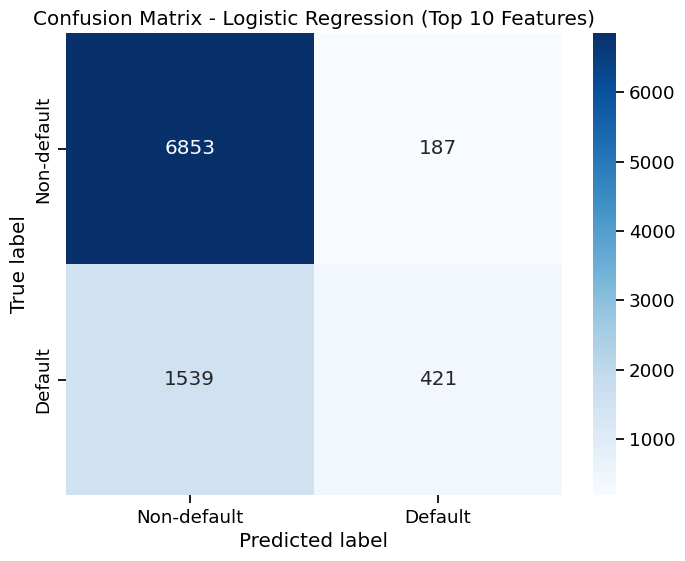

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Average 5-Fold CV ROC-AUC Score (Top 10 Features - Logistic Regression): 0.7028
Standard Deviation (Top 10 Features - Logistic Regression): 0.0149


In [34]:
# Get feature importances from the best logistic regression model
lr_feature_importances = np.abs(best_lr.coef_[0])  # Take the absolute value of the coefficients

lr_importances_df = pd.DataFrame({'Feature': X1_train.columns, 'Importance': lr_feature_importances})
lr_importances_df = lr_importances_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for Logistic Regression Best Model:")
print(lr_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lr_importances_df.head(10))
plt.title('Top 10 Feature Importances for Logistic Regression Best Model')
plt.show()

# Extract the top 10 features
top_10_lr_features = lr_importances_df.head(10)['Feature'].tolist()

X1_train_top10_lr = X1_train[top_10_lr_features]
X1_test_top10_lr = X1_test[top_10_lr_features]

print("Top 10 Features (Logistic Regression):", top_10_lr_features)

best_lr_top10 = LogisticRegression(**best_params, random_state=42, max_iter=1000)
best_lr_top10.fit(X1_train_top10_lr, y1_train)

y1_pred_top10_lr = best_lr_top10.predict(X1_test_top10_lr)
y1_pred_proba_top10_lr = best_lr_top10.predict_proba(X1_test_top10_lr)[:, 1]

accuracy_top10_lr = accuracy_score(y1_test, y1_pred_top10_lr)
roc_auc_top10_lr = roc_auc_score(y1_test, y1_pred_proba_top10_lr)

print('Accuracy (Top 10 Features - Logistic Regression):', accuracy_top10_lr)
print('ROC-AUC score (Top 10 Features - Logistic Regression):', roc_auc_top10_lr)

print("\nClassification Report (Top 10 Features - Logistic Regression):\n", classification_report(y1_test, y1_pred_top10_lr))

plt.figure(figsize=(8, 6))
conf_matrix_top10_lr = confusion_matrix(y1_test, y1_pred_top10_lr)
sns.heatmap(conf_matrix_top10_lr, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (Top 10 Features)")
plt.show()

# Perform 5-fold cross-validation on the entire dataset with top 10 features
cv_scores_top10_lr = cross_val_score(best_lr_top10, X1[top_10_lr_features], y1, cv=5, scoring='roc_auc')

print("\nAverage 5-Fold CV ROC-AUC Score (Top 10 Features - Logistic Regression):", round(np.mean(cv_scores_top10_lr), 4))
print("Standard Deviation (Top 10 Features - Logistic Regression):", round(np.std(cv_scores_top10_lr), 4))

## SVM

Accuracy (SVM): 0.8182222222222222
ROC-AUC Score (SVM): 0.7166546121289425
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



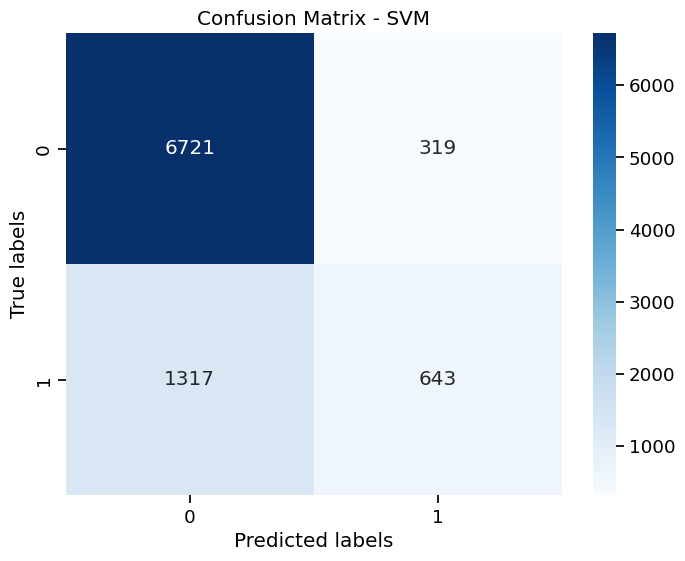

KeyboardInterrupt: 

In [54]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)
X1_scaled = scaler.fit_transform(X1)

svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X1_train_scaled, y1_train)

y_pred_svm = svm_model.predict(X1_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X1_test_scaled)[:, 1]

print("Accuracy (SVM):", accuracy_score(y1_test, y_pred_svm))
print("ROC-AUC Score (SVM):", roc_auc_score(y1_test, y_pred_proba_svm))
print("Classification Report (SVM):\n", classification_report(y1_test, y_pred_svm))

conf_mat_svm = confusion_matrix(y1_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_svm), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()

## Random Forest

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters (Random Forest): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Best ROC-AUC Score (Random Forest): 0.7829534658865902
Accuracy (Random Forest): 0.8205555555555556
ROC-AUC Score (Random Forest): 0.7750385551948052
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



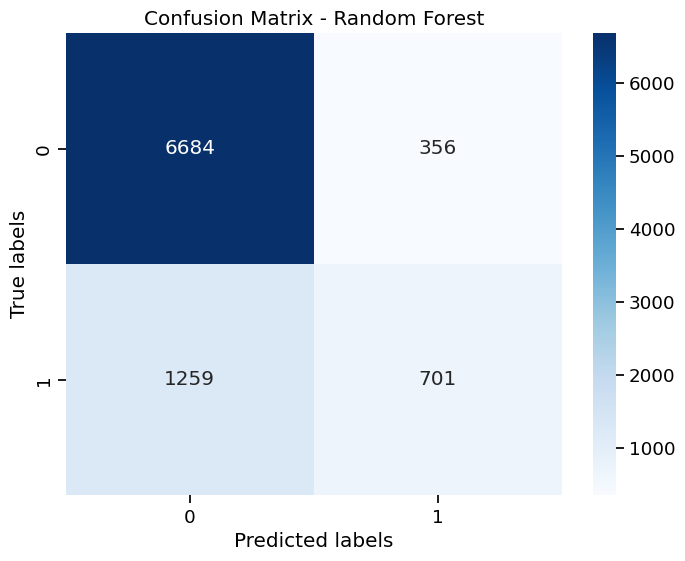


Average 5-Fold CV ROC-AUC Score (Random Forest): 0.7804
Standard Deviation (Random Forest): 0.0204


In [39]:
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X1_train, y1_train)

print("Best Hyperparameters (Random Forest):", random_search_rf.best_params_)
print("Best ROC-AUC Score (Random Forest):", random_search_rf.best_score_)

best_rf = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
best_rf.fit(X1_train, y1_train)

y_pred_rf = best_rf.predict(X1_test)
y_pred_proba_rf = best_rf.predict_proba(X1_test)[:, 1]

print("Accuracy (Random Forest):", accuracy_score(y1_test, y_pred_rf))
print("ROC-AUC Score (Random Forest):", roc_auc_score(y1_test, y_pred_proba_rf))

print("Classification Report (Random Forest):\n", classification_report(y1_test, y_pred_rf))

conf_mat_rf = confusion_matrix(y1_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

cv_scores_rf = cross_val_score(best_rf, X1, y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (Random Forest):", round(np.mean(cv_scores_rf), 4))
print("Standard Deviation (Random Forest):", round(np.std(cv_scores_rf), 4))

Top 10 Feature Importances for Random Forest Best Model:
      Feature  Importance
5       PAY_0    0.249345
6       PAY_2    0.112719
7       PAY_3    0.064233
8       PAY_4    0.055835
17   PAY_AMT1    0.043533
10      PAY_6    0.042938
9       PAY_5    0.039891
0   LIMIT_BAL    0.036641
11  BILL_AMT1    0.035148
18   PAY_AMT2    0.031930


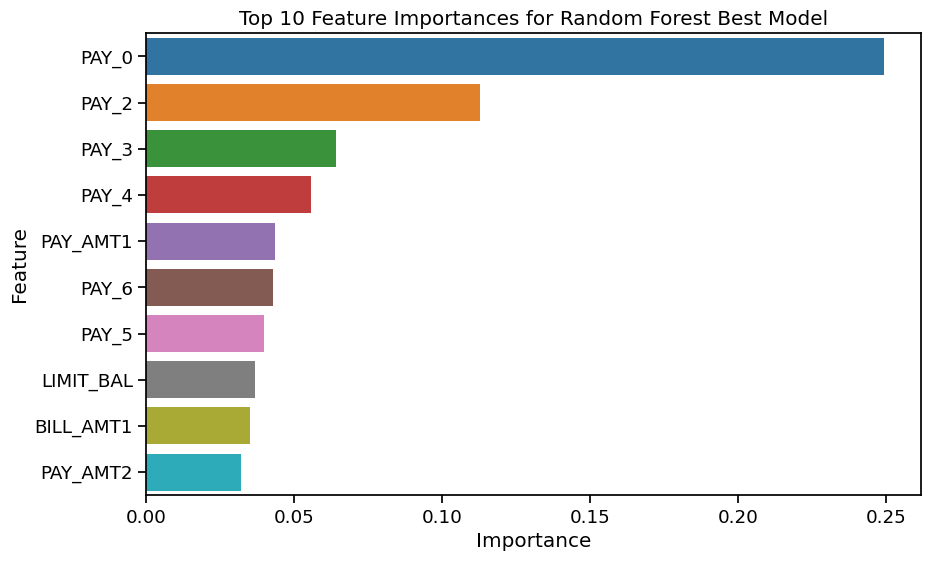

Top 10 Features (Random Forest): ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_AMT1', 'PAY_6', 'PAY_5', 'LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT2']
Accuracy (Top 10 Features - Random Forest): 0.8208888888888889
ROC-AUC score (Top 10 Features - Random Forest): 0.7733525263798702

Classification Report (Top 10 Features - Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



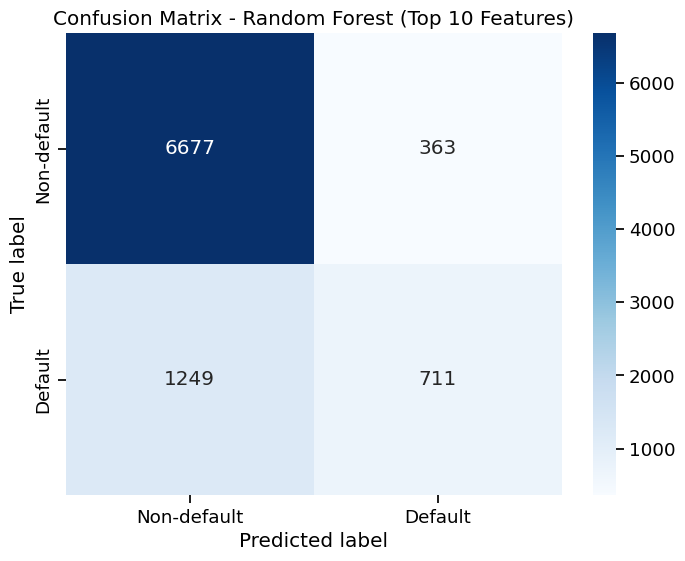


Average 5-Fold CV ROC-AUC Score (Top 10 Features - Random Forest): 0.7788
Standard Deviation (Top 10 Features - Random Forest): 0.0207


In [40]:
# Get feature importances from the best random forest model
rf_feature_importances = best_rf.feature_importances_

rf_importances_df = pd.DataFrame({'Feature': X1_train.columns, 'Importance': rf_feature_importances})
rf_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for Random Forest Best Model:")
print(rf_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances_df.head(10))
plt.title('Top 10 Feature Importances for Random Forest Best Model')
plt.show()

# Extract the top 10 features
top_10_rf_features = rf_importances_df.head(10)['Feature'].tolist()

X1_train_top10_rf = X1_train[top_10_rf_features]
X1_test_top10_rf = X1_test[top_10_rf_features]

print("Top 10 Features (Random Forest):", top_10_rf_features)

best_rf_top10 = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
best_rf_top10.fit(X1_train_top10_rf, y1_train)

y1_pred_top10_rf = best_rf_top10.predict(X1_test_top10_rf)
y1_pred_proba_top10_rf = best_rf_top10.predict_proba(X1_test_top10_rf)[:, 1]

accuracy_top10_rf = accuracy_score(y1_test, y1_pred_top10_rf)
roc_auc_top10_rf = roc_auc_score(y1_test, y1_pred_proba_top10_rf)

print('Accuracy (Top 10 Features - Random Forest):', accuracy_top10_rf)
print('ROC-AUC score (Top 10 Features - Random Forest):', roc_auc_top10_rf)

print("\nClassification Report (Top 10 Features - Random Forest):\n", classification_report(y1_test, y1_pred_top10_rf))

plt.figure(figsize=(8, 6))
conf_matrix_top10_rf = confusion_matrix(y1_test, y1_pred_top10_rf)
sns.heatmap(conf_matrix_top10_rf, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest (Top 10 Features)")
plt.show()

cv_scores_top10_rf = cross_val_score(best_rf_top10, X1[top_10_rf_features], y1, cv=5, scoring='roc_auc')

print("\nAverage 5-Fold CV ROC-AUC Score (Top 10 Features - Random Forest):", round(np.mean(cv_scores_top10_rf), 4))
print("Standard Deviation (Top 10 Features - Random Forest):", round(np.std(cv_scores_top10_rf), 4))

## XGBoost

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters (XGBoost): {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best ROC-AUC Score (XGBoost): 0.7854211105630989


C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:04:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (XGBoost): 0.819
ROC-AUC Score (XGBoost): 0.7797550802991651
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.33      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



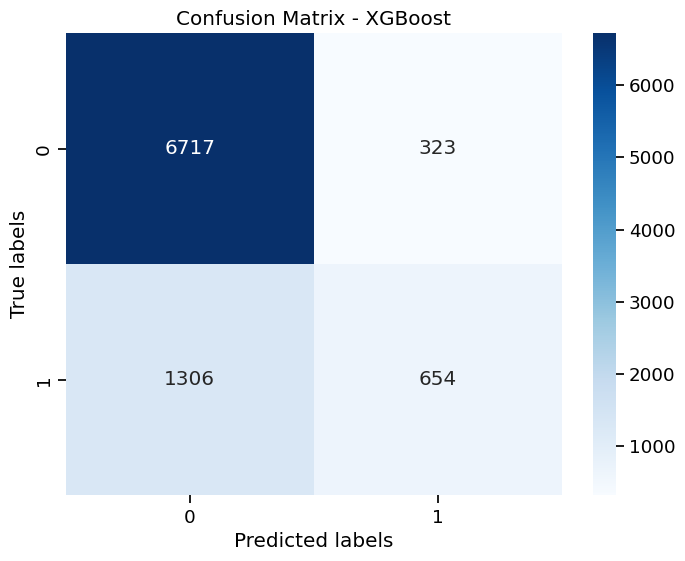

C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\


Average 5-Fold CV ROC-AUC Score (XGBoost): 0.7841
Standard Deviation (XGBoost): 0.0204


In [41]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4, 5]
}

xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X1_train, y1_train)

print("Best Hyperparameters (XGBoost):", random_search_xgb.best_params_)
print("Best ROC-AUC Score (XGBoost):", random_search_xgb.best_score_)

best_xgb = XGBClassifier(**random_search_xgb.best_params_, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X1_train, y1_train)

y_pred_xgb = best_xgb.predict(X1_test)
y_pred_proba_xgb = best_xgb.predict_proba(X1_test)[:, 1]

print("Accuracy (XGBoost):", accuracy_score(y1_test, y_pred_xgb))
print("ROC-AUC Score (XGBoost):", roc_auc_score(y1_test, y_pred_proba_xgb))

print("Classification Report (XGBoost):\n", classification_report(y1_test, y_pred_xgb))

conf_mat_xgb = confusion_matrix(y1_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_xgb), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

cv_scores_xgb = cross_val_score(best_xgb, X1, y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (XGBoost):", round(np.mean(cv_scores_xgb), 4))
print("Standard Deviation (XGBoost):", round(np.std(cv_scores_xgb), 4))

Top 10 Feature Importances for XGBoost Best Model:
      Feature  Importance
5       PAY_0    0.417439
6       PAY_2    0.165946
7       PAY_3    0.080292
8       PAY_4    0.047148
10      PAY_6    0.028314
9       PAY_5    0.026524
17   PAY_AMT1    0.018314
0   LIMIT_BAL    0.017938
19   PAY_AMT3    0.015660
18   PAY_AMT2    0.015568


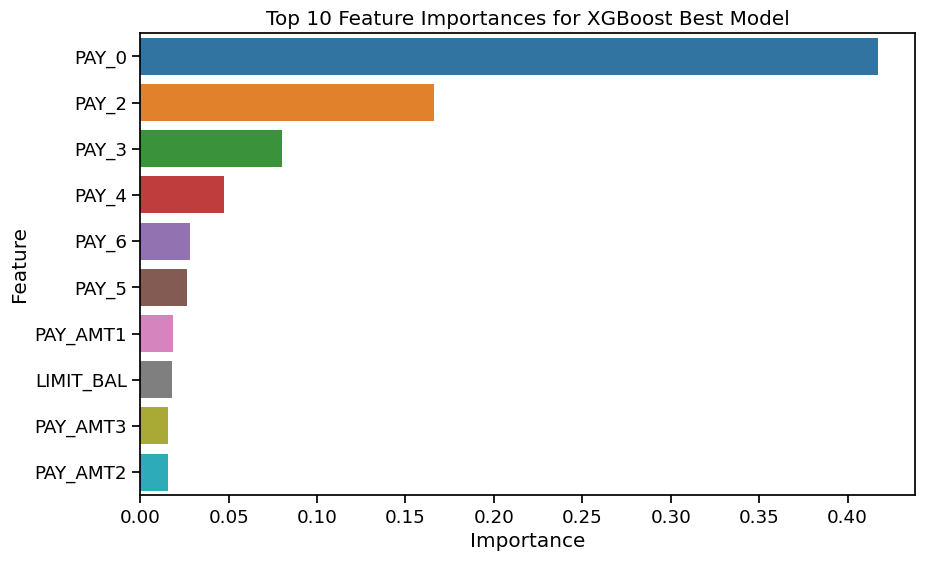

Top 10 Features (XGBoost): ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'PAY_5', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT3', 'PAY_AMT2']


C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Top 10 Features - XGBoost): 0.8183333333333334
ROC-AUC score (Top 10 Features - XGBoost): 0.7720632102272728

Classification Report (Top 10 Features - XGBoost):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.34      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



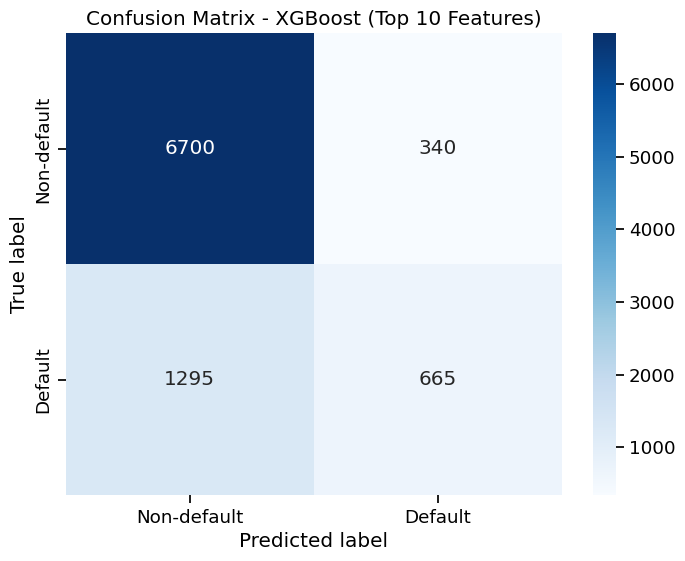

C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:05:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\


Average 5-Fold CV ROC-AUC Score (Top 10 Features - XGBoost): 0.7784
Standard Deviation (Top 10 Features - XGBoost): 0.0191


In [42]:
# Get feature importances from the best XGBoost model
xgb_feature_importances = best_xgb.feature_importances_

xgb_importances_df = pd.DataFrame({'Feature': X1_train.columns, 'Importance': xgb_feature_importances})
xgb_importances_df = xgb_importances_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for XGBoost Best Model:")
print(xgb_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances_df.head(10))
plt.title('Top 10 Feature Importances for XGBoost Best Model')
plt.show()

# Extract the top 50 features
top_10_xgb_features = xgb_importances_df.head(10)['Feature'].tolist()

X1_train_top10_xgb = X1_train[top_10_xgb_features]
X1_test_top10_xgb = X1_test[top_10_xgb_features]

print("Top 10 Features (XGBoost):", top_10_xgb_features)

best_xgb_top10 = XGBClassifier(**random_search_xgb.best_params_, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_top10.fit(X1_train_top10_xgb, y1_train)

y1_pred_top10_xgb = best_xgb_top10.predict(X1_test_top10_xgb)
y1_pred_proba_top10_xgb = best_xgb_top10.predict_proba(X1_test_top10_xgb)[:, 1]

accuracy_top10_xgb = accuracy_score(y1_test, y1_pred_top10_xgb)
roc_auc_top10_xgb = roc_auc_score(y1_test, y1_pred_proba_top10_xgb)

print('Accuracy (Top 10 Features - XGBoost):', accuracy_top10_xgb)
print('ROC-AUC score (Top 10 Features - XGBoost):', roc_auc_top10_xgb)

print("\nClassification Report (Top 10 Features - XGBoost):\n", classification_report(y1_test, y1_pred_top10_xgb))

plt.figure(figsize=(8, 6))
conf_matrix_top10_xgb = confusion_matrix(y1_test, y1_pred_top10_xgb)
sns.heatmap(conf_matrix_top10_xgb, annot=True, cmap="Blues", fmt="d", xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - XGBoost (Top 10 Features)")
plt.show()

cv_scores_top10_xgb = cross_val_score(best_xgb_top10, X1[top_10_xgb_features], y1, cv=5, scoring='roc_auc')

print("\nAverage 5-Fold CV ROC-AUC Score (Top 10 Features - XGBoost):", round(np.mean(cv_scores_top10_xgb), 4))
print("Standard Deviation (Top 10 Features - XGBoost):", round(np.std(cv_scores_top10_xgb), 4))

## Catboost

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters (CatBoost): {'random_strength': 0.1, 'learning_rate': 0.05, 'l2_leaf_reg': 9, 'iterations': 400, 'depth': 4, 'border_count': 32, 'bagging_temperature': 1.5}
Best ROC-AUC Score (CatBoost): 0.7850127392593272
Accuracy (CatBoost): 0.8194444444444444
ROC-AUC Score (CatBoost): 0.7806360882421151
Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



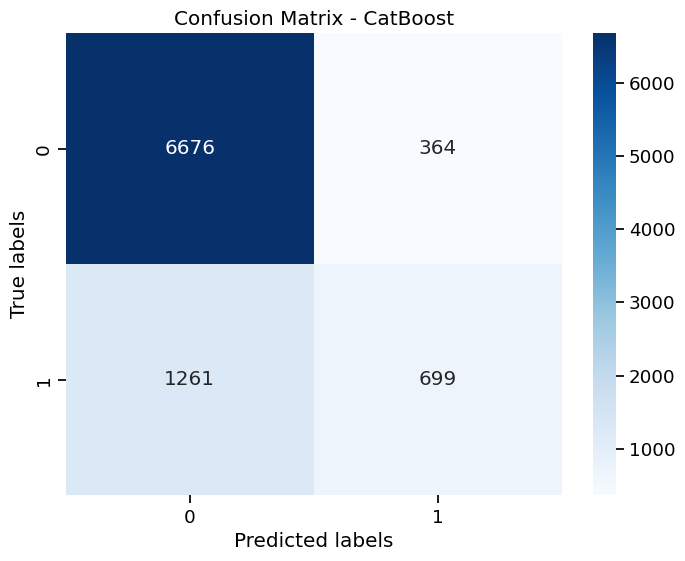


Average 5-Fold CV ROC-AUC Score (CatBoost): 0.7842
Standard Deviation (CatBoost): 0.02


In [43]:
param_dist_cat = {
    'iterations': [100, 200, 300, 400, 500],
    'depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 48, 64, 96, 128],
    'bagging_temperature': [0, 0.5, 1, 1.5, 2],
    'random_strength': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

cat = CatBoostClassifier(task_type='CPU', eval_metric='AUC', random_seed=42, silent=True)

random_search_cat = RandomizedSearchCV(cat, param_distributions=param_dist_cat, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search_cat.fit(X1_train, y1_train)

print("Best Hyperparameters (CatBoost):", random_search_cat.best_params_)
print("Best ROC-AUC Score (CatBoost):", random_search_cat.best_score_)

best_cat = CatBoostClassifier(**random_search_cat.best_params_, task_type='CPU', eval_metric='AUC', random_seed=42, silent=True)
best_cat.fit(X1_train, y1_train)

y_pred_cat = best_cat.predict(X1_test)
y_pred_proba_cat = best_cat.predict_proba(X1_test)[:, 1]

print("Accuracy (CatBoost):", accuracy_score(y1_test, y_pred_cat))
print("ROC-AUC Score (CatBoost):", roc_auc_score(y1_test, y_pred_proba_cat))

print("Classification Report (CatBoost):\n", classification_report(y1_test, y_pred_cat))

conf_mat_cat = confusion_matrix(y1_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_cat), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CatBoost')
plt.show()

cv_scores_cat = cross_val_score(best_cat, X1, y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (CatBoost):", round(np.mean(cv_scores_cat), 4))
print("Standard Deviation (CatBoost):", round(np.std(cv_scores_cat), 4))

Top 10 Feature Importances for CatBoost:
      Feature  Importance
5       PAY_0   22.382842
0   LIMIT_BAL    9.738587
11  BILL_AMT1    8.883457
17   PAY_AMT1    5.326613
6       PAY_2    5.026771
18   PAY_AMT2    4.548392
7       PAY_3    4.347296
20   PAY_AMT4    4.273901
19   PAY_AMT3    4.261240
4         AGE    3.825793


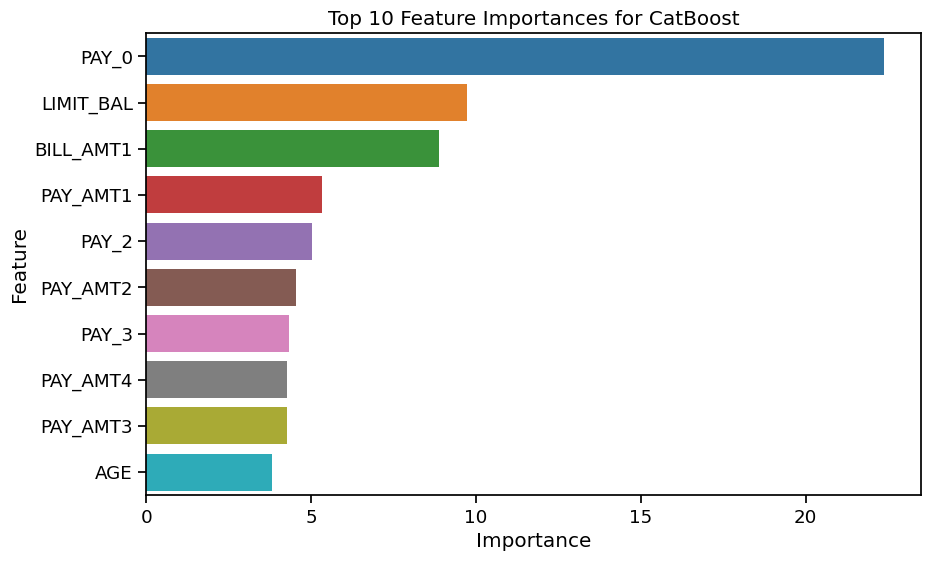

Accuracy (CatBoost with top features): 0.8192222222222222
ROC-AUC Score (CatBoost with top features): 0.7759796788033396
Classification Report (CatBoost with top features):
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



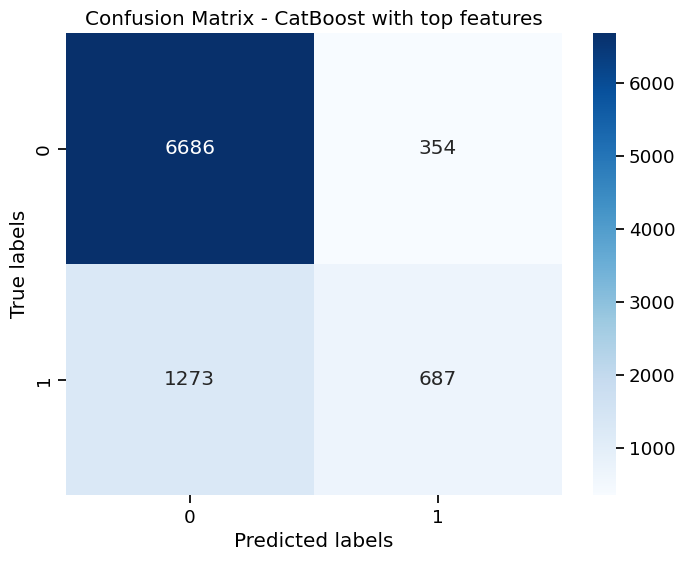


Average 5-Fold CV ROC-AUC Score (CatBoost with top features): 0.7798
Standard Deviation (CatBoost with top features): 0.02


In [44]:
# Get feature importances from the best CatBoost model
cat_feature_importances = best_cat.get_feature_importance()

cat_importances_df = pd.DataFrame({'Feature': X1_train.columns, 'Importance': cat_feature_importances})
cat_importances_df = cat_importances_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for CatBoost:")
print(cat_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_importances_df.head(10))
plt.title('Top 10 Feature Importances for CatBoost')
plt.show()

# Use the top 70 features to train a new model
top_features_cat = cat_importances_df.head(10)['Feature'].values
X1_train_top_cat = X1_train[top_features_cat]
X1_test_top_cat = X1_test[top_features_cat]

best_cat_top = CatBoostClassifier(**random_search_cat.best_params_, task_type='CPU', eval_metric='AUC', random_seed=42, silent=True)
best_cat_top.fit(X1_train_top_cat, y1_train)

y_pred_cat_top = best_cat_top.predict(X1_test_top_cat)
y_pred_proba_cat_top = best_cat_top.predict_proba(X1_test_top_cat)[:, 1]

print("Accuracy (CatBoost with top features):", accuracy_score(y1_test, y_pred_cat_top))
print("ROC-AUC Score (CatBoost with top features):", roc_auc_score(y1_test, y_pred_proba_cat_top))

print("Classification Report (CatBoost with top features):\n", classification_report(y1_test, y_pred_cat_top))

conf_mat_cat_top = confusion_matrix(y1_test, y_pred_cat_top)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_cat_top), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CatBoost with top features')
plt.show()

cv_scores_cat_top = cross_val_score(best_cat_top, X1[top_features_cat], y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (CatBoost with top features):", round(np.mean(cv_scores_cat_top), 4))
print("Standard Deviation (CatBoost with top features):", round(np.std(cv_scores_cat_top), 4))

## LightGBM

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Best Hyperparameters (LightGBM): {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31}
Best ROC-AUC Score (LightGBM): 0.7837814567563969
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3261
[LightGBM] [Inf

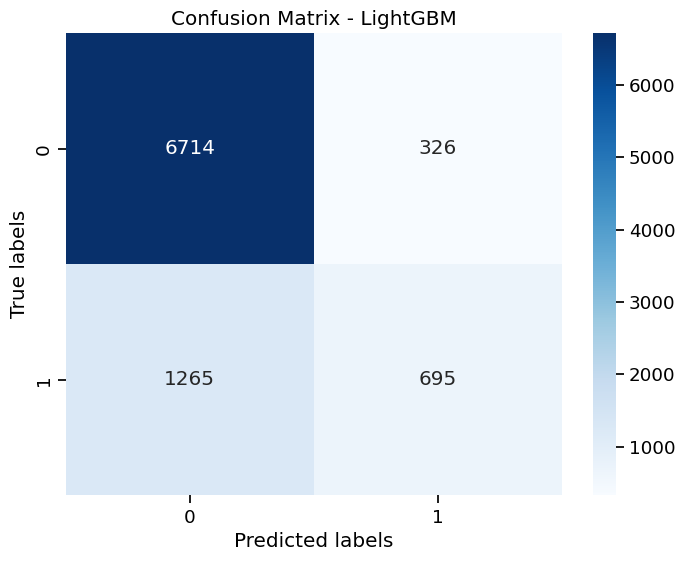

[LightGBM] [Info] Number of positive: 5308, number of negative: 18692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221167 -> initscore=-1.258881
[LightGBM] [Info] Start training from score -1.258881
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [In

In [45]:
param_grid_lgb = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

grid_search_lgb = GridSearchCV(estimator=lgb_clf, param_grid=param_grid_lgb, scoring='roc_auc', n_jobs=-1, cv=3, verbose=2)
grid_search_lgb.fit(X1_train, y1_train)

print("Best Hyperparameters (LightGBM):", grid_search_lgb.best_params_)
print("Best ROC-AUC Score (LightGBM):", grid_search_lgb.best_score_)

best_lgb = lgb.LGBMClassifier(**grid_search_lgb.best_params_, boosting_type='gbdt', objective='binary', random_state=42)
best_lgb.fit(X1_train, y1_train)

y_pred_lgb = best_lgb.predict(X1_test)
y_pred_proba_lgb = best_lgb.predict_proba(X1_test)[:, 1]

print("Accuracy (LightGBM):", accuracy_score(y1_test, y_pred_lgb))
print("ROC-AUC Score (LightGBM):", roc_auc_score(y1_test, y_pred_proba_lgb))

print("Classification Report (LightGBM):\n", classification_report(y1_test, y_pred_lgb))

conf_mat_lgb = confusion_matrix(y1_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_lgb), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - LightGBM')
plt.show()

cv_scores_lgb = cross_val_score(best_lgb, X1, y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (LightGBM):", round(np.mean(cv_scores_lgb), 4))
print("Standard Deviation (LightGBM):", round(np.std(cv_scores_lgb), 4))

Top 10 Feature Importances for LightGBM:
      Feature  Importance
0   LIMIT_BAL         896
11  BILL_AMT1         838
19   PAY_AMT3         557
17   PAY_AMT1         533
12  BILL_AMT2         520
4         AGE         512
18   PAY_AMT2         509
20   PAY_AMT4         467
5       PAY_0         465
22   PAY_AMT6         449


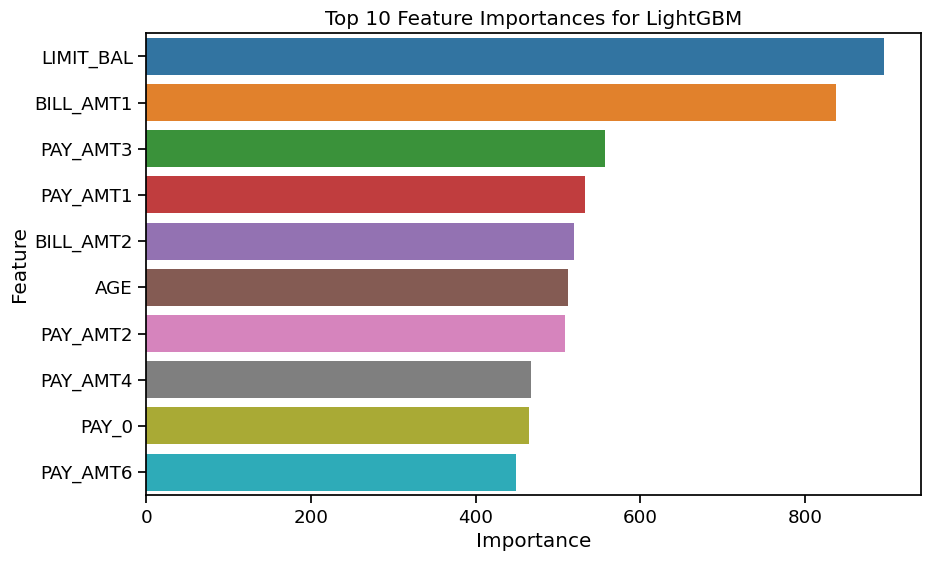

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Accuracy (LightGBM with top features): 0.8191111111111111
ROC-AUC Score (LightGBM with top features): 0.7708754638218924
Classification Report (LightGBM with top features):
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.68      0.32      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



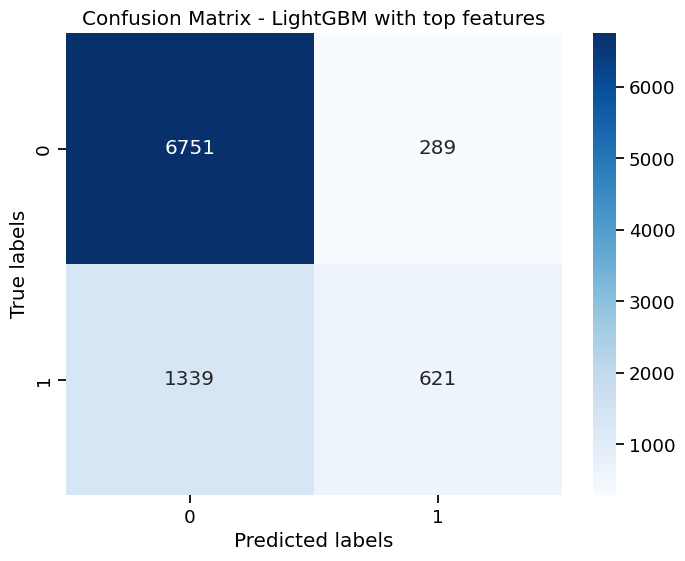

[LightGBM] [Info] Number of positive: 5308, number of negative: 18692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1924
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221167 -> initscore=-1.258881
[LightGBM] [Info] Start training from score -1.258881
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1924
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [In

In [46]:
lgb_feature_importances = best_lgb.feature_importances_

lgb_importances_df = pd.DataFrame({'Feature': X1_train.columns, 'Importance': lgb_feature_importances})
lgb_importances_df = lgb_importances_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for LightGBM:")
print(lgb_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_importances_df.head(10))
plt.title('Top 10 Feature Importances for LightGBM')
plt.show()

# Use the top 60 features to train a new model
top_features_lgb = lgb_importances_df.head(10)['Feature'].values
X1_train_top_lgb = X1_train[top_features_lgb]
X1_test_top_lgb = X1_test[top_features_lgb]

best_lgb_top = lgb.LGBMClassifier(**grid_search_lgb.best_params_, boosting_type='gbdt', objective='binary', random_state=42)
best_lgb_top.fit(X1_train_top_lgb, y1_train)

y_pred_lgb_top = best_lgb_top.predict(X1_test_top_lgb)
y_pred_proba_lgb_top = best_lgb_top.predict_proba(X1_test_top_lgb)[:, 1]

print("Accuracy (LightGBM with top features):", accuracy_score(y1_test, y_pred_lgb_top))
print("ROC-AUC Score (LightGBM with top features):", roc_auc_score(y1_test, y_pred_proba_lgb_top))

print("Classification Report (LightGBM with top features):\n", classification_report(y1_test, y_pred_lgb_top))

conf_mat_lgb_top = confusion_matrix(y1_test, y_pred_lgb_top)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_mat_lgb_top), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - LightGBM with top features')
plt.show()

cv_scores_lgb_top = cross_val_score(best_lgb_top, X1[top_features_lgb], y1, cv=5, scoring='roc_auc')

print()
print("Average 5-Fold CV ROC-AUC Score (LightGBM with top features):", round(np.mean(cv_scores_lgb_top), 4))
print("Standard Deviation (LightGBM with top features):", round(np.std(cv_scores_lgb_top), 4))

# Applying SMOTE

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 16324, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3436
[LightGBM] [Info] Number of data points in the train set: 32648, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Logistic Regression:
Accuracy: 0.6867777777777778
ROC-AUC Score: 0.6985870100881262
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78      7040
           1       0.36      0.57      0.44      1960

    accuracy                           0.69      9000
   macro avg       0.61      0.64      0.61      9000
weighted avg       0.75      0.69      0.71      9000



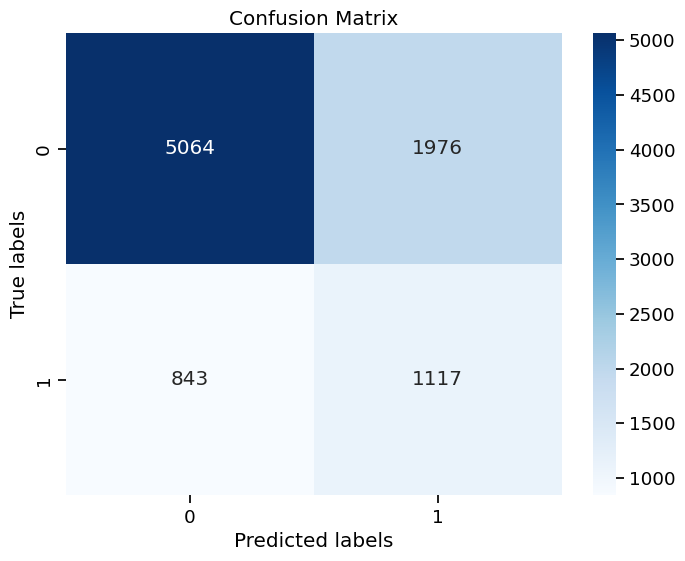

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge',

Average 5-Fold CV ROC-AUC Score: 0.7218
Standard Deviation: 0.0148
Random Forest:
Accuracy: 0.7707777777777778
ROC-AUC Score: 0.7555381783395176
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7040
           1       0.48      0.54      0.51      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.77      0.78      9000



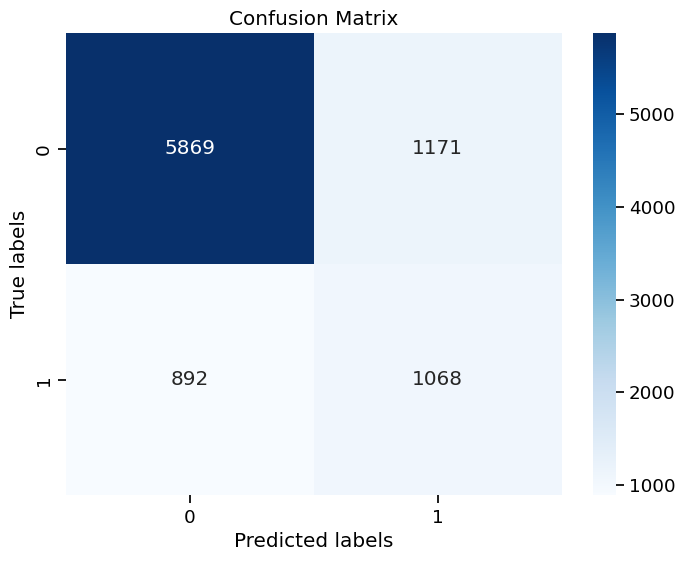

Average 5-Fold CV ROC-AUC Score: 0.7804
Standard Deviation: 0.0204
XGBoost:
Accuracy: 0.773
ROC-AUC Score: 0.7546768465909091
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      7040
           1       0.48      0.52      0.50      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.68      9000
weighted avg       0.78      0.77      0.78      9000



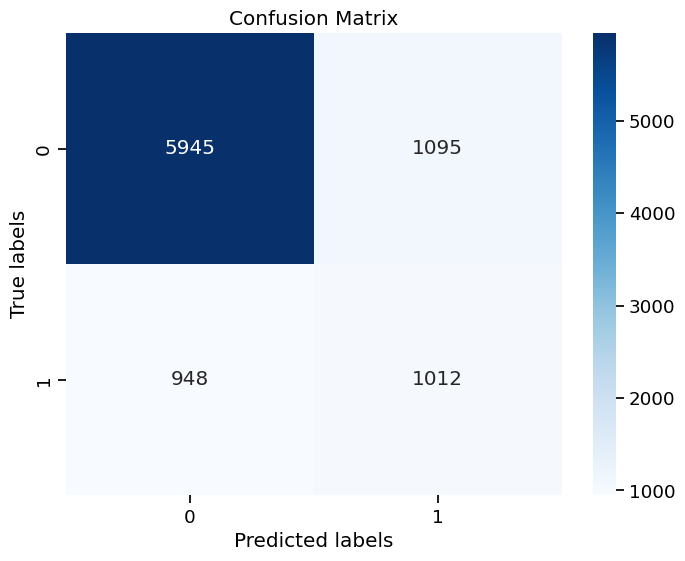

C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\

Average 5-Fold CV ROC-AUC Score: 0.7841
Standard Deviation: 0.0204
CatBoost:
Accuracy: 0.763
ROC-AUC Score: 0.7472722199675325
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      7040
           1       0.46      0.51      0.48      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.67      0.67      9000
weighted avg       0.77      0.76      0.77      9000



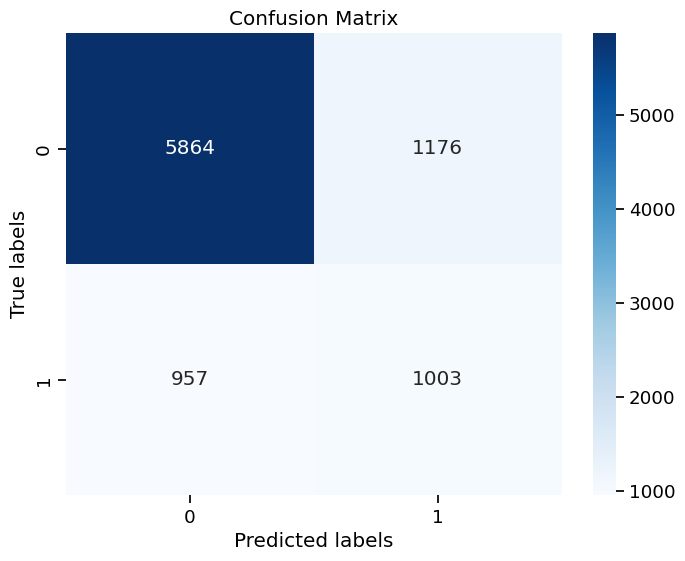

Average 5-Fold CV ROC-AUC Score: 0.7842
Standard Deviation: 0.02
LightGBM:
Accuracy: 0.7668888888888888
ROC-AUC Score: 0.7542003058325604
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7040
           1       0.47      0.54      0.50      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.78      0.77      0.77      9000



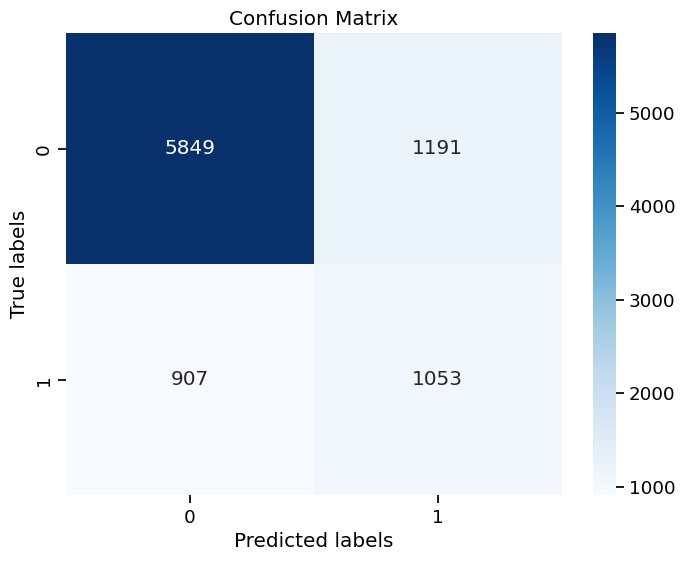

[LightGBM] [Info] Number of positive: 5308, number of negative: 18692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221167 -> initscore=-1.258881
[LightGBM] [Info] Start training from score -1.258881
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [In

In [48]:
smote = SMOTE(random_state=42)
X1_train_smote, y1_train_smote = smote.fit_resample(X1_train, y1_train)

# Best parameters from previous searches
best_params_lr = random_search_lr.best_params_
best_params_rf = random_search_rf.best_params_
best_params_xgb = random_search_xgb.best_params_
best_params_cat = random_search_cat.best_params_
best_params_lgb = grid_search_lgb.best_params_

# Initialize and train models with the best parameters
best_params_lr = random_search_lr.best_params_.copy()
best_params_lr.pop('max_iter', None)  
best_lr = LogisticRegression(**best_params_lr, random_state=42, max_iter=1000)
best_lr.fit(X1_train_smote, y1_train_smote)

best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X1_train_smote, y1_train_smote)

best_xgb = XGBClassifier(**best_params_xgb, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X1_train_smote, y1_train_smote)

best_cat = CatBoostClassifier(**best_params_cat, task_type='CPU', eval_metric='AUC', random_seed=42, silent=True)
best_cat.fit(X1_train_smote, y1_train_smote)

best_lgb = lgb.LGBMClassifier(**best_params_lgb, boosting_type='gbdt', objective='binary', random_state=42)
best_lgb.fit(X1_train_smote, y1_train_smote)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    cv_scores = cross_val_score(model, X1, y1, cv=5, scoring='roc_auc')
    print("Average 5-Fold CV ROC-AUC Score:", round(np.mean(cv_scores), 4))
    print("Standard Deviation:", round(np.std(cv_scores), 4))

print("Logistic Regression:")
evaluate_model(best_lr, X1_test, y1_test)

print("Random Forest:")
evaluate_model(best_rf, X1_test, y1_test)

print("XGBoost:")
evaluate_model(best_xgb, X1_test, y1_test)

print("CatBoost:")
evaluate_model(best_cat, X1_test, y1_test)

print("LightGBM:")
evaluate_model(best_lgb, X1_test, y1_test)

SVM:
Accuracy: 0.5888888888888889
ROC-AUC Score: 0.6716986752087198
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.56      0.68      7040
           1       0.30      0.68      0.42      1960

    accuracy                           0.59      9000
   macro avg       0.58      0.62      0.55      9000
weighted avg       0.74      0.59      0.62      9000



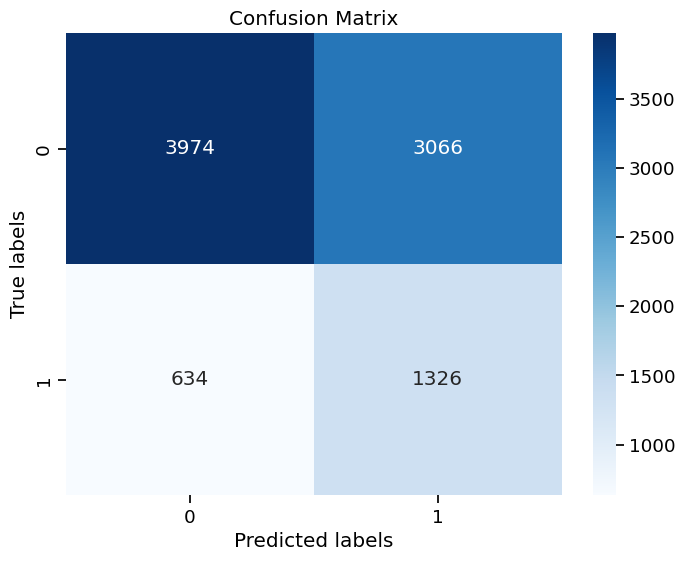

KeyboardInterrupt: 

In [55]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X1_train_smote, y1_train_smote)

print("SVM:")
evaluate_model(svm_model, X1_test, y1_test)

Random Forest:


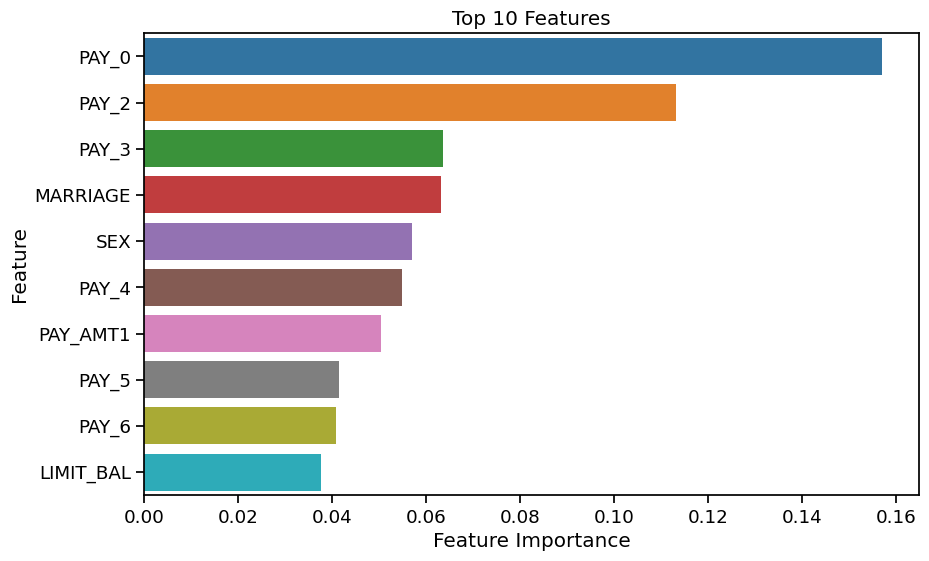

Accuracy: 0.7606666666666667
ROC-AUC Score: 0.7394728736665122
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      7040
           1       0.46      0.53      0.49      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.77      0.76      0.77      9000



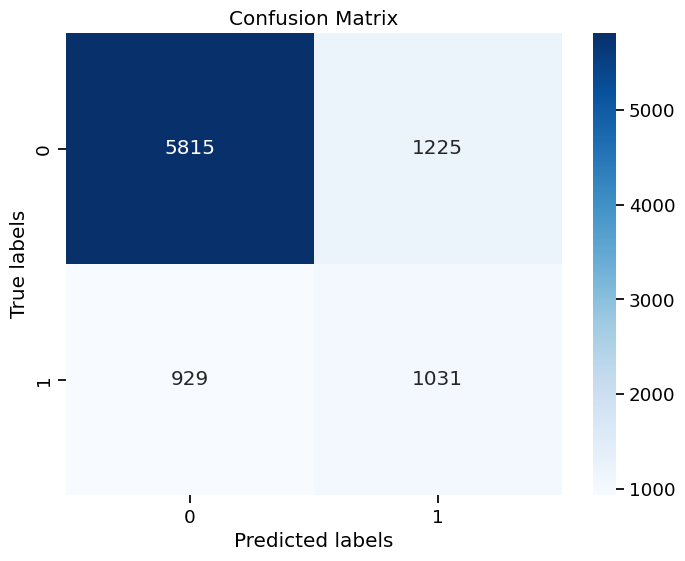

Average 5-Fold CV ROC-AUC Score: 0.7804
Standard Deviation: 0.0204
XGBoost:


C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


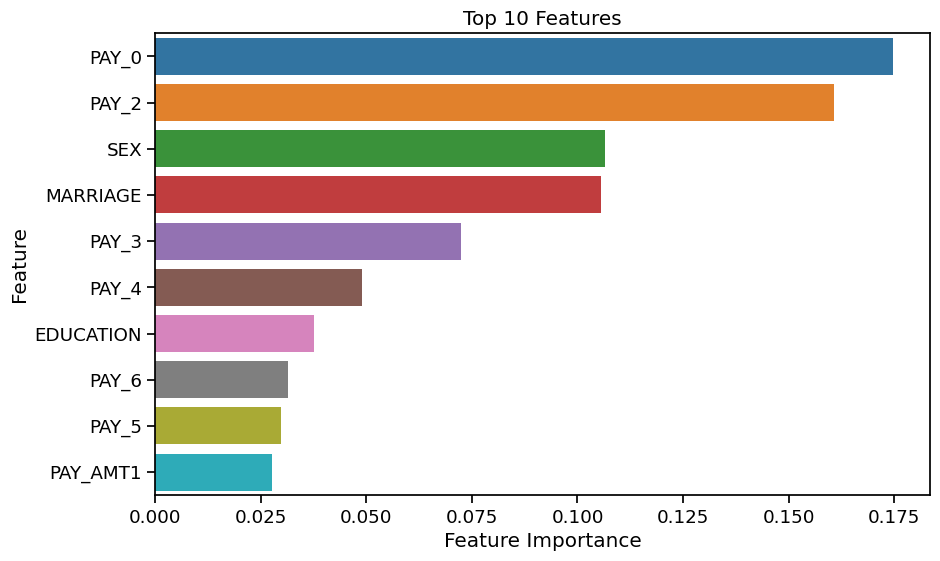

C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7636666666666667
ROC-AUC Score: 0.7320970547309833
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      7040
           1       0.46      0.51      0.48      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.67      0.67      9000
weighted avg       0.77      0.76      0.77      9000



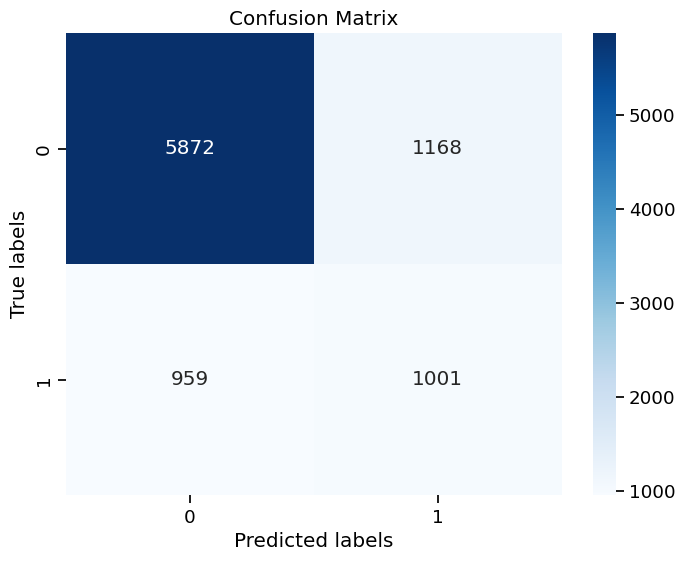

C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\spide\anaconda3\Lib\site-packages\

Average 5-Fold CV ROC-AUC Score: 0.7841
Standard Deviation: 0.0204
CatBoost:


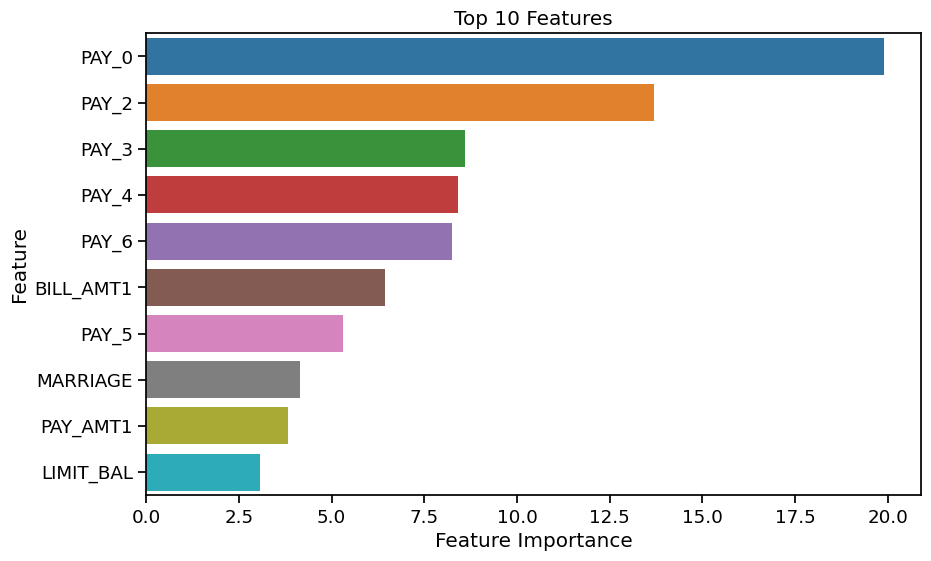

Accuracy: 0.7667777777777778
ROC-AUC Score: 0.7507362447820036
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      7040
           1       0.47      0.53      0.50      1960

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.78      0.77      0.77      9000



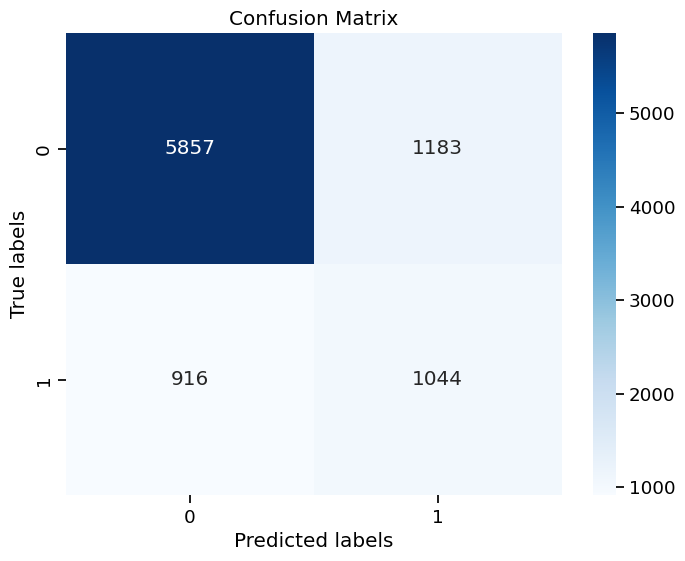

Average 5-Fold CV ROC-AUC Score: 0.7842
Standard Deviation: 0.02
LightGBM:
[LightGBM] [Info] Number of positive: 16324, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3436
[LightGBM] [Info] Number of data points in the train set: 32648, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


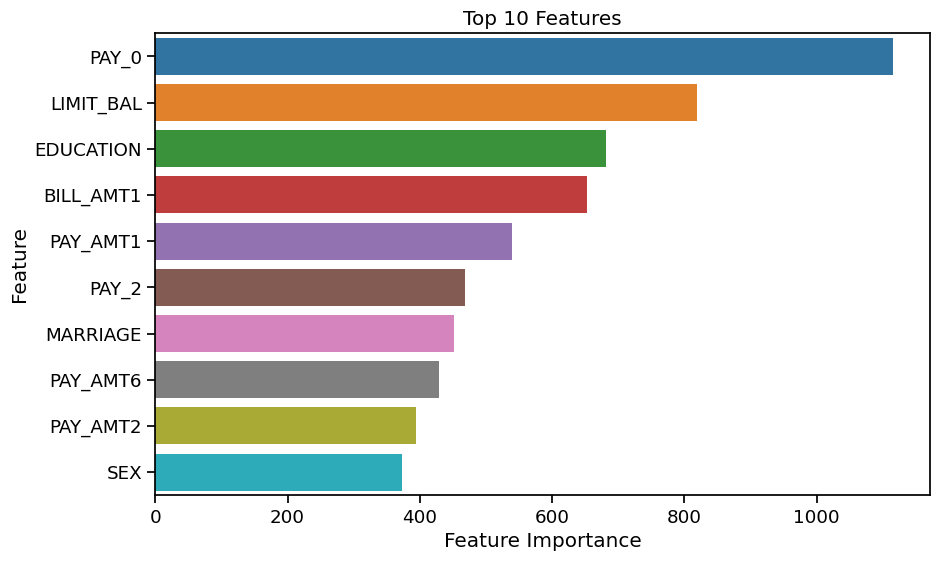

[LightGBM] [Info] Number of positive: 16324, number of negative: 16324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 32648, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.7615555555555555
ROC-AUC Score: 0.7459327893089054
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7040
           1       0.46      0.54      0.50      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.68      0.67      9000
weighted avg       0.78      0.76      0.77      9000



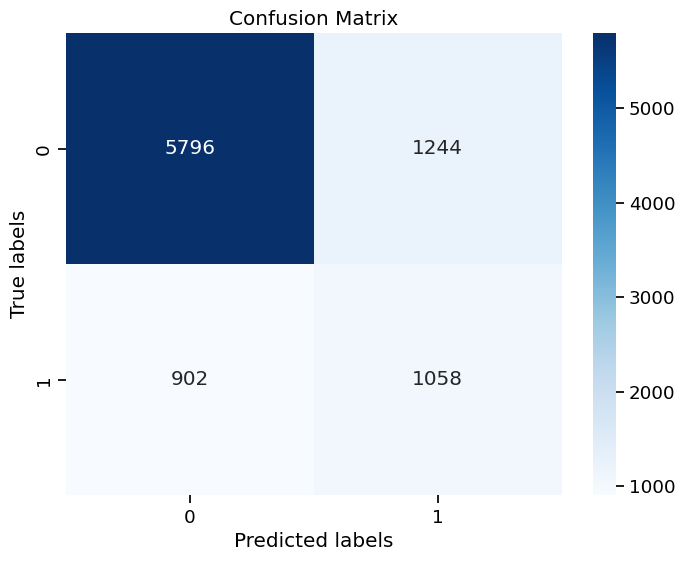

[LightGBM] [Info] Number of positive: 5308, number of negative: 18692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3262
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221167 -> initscore=-1.258881
[LightGBM] [Info] Start training from score -1.258881
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3259
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [In

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


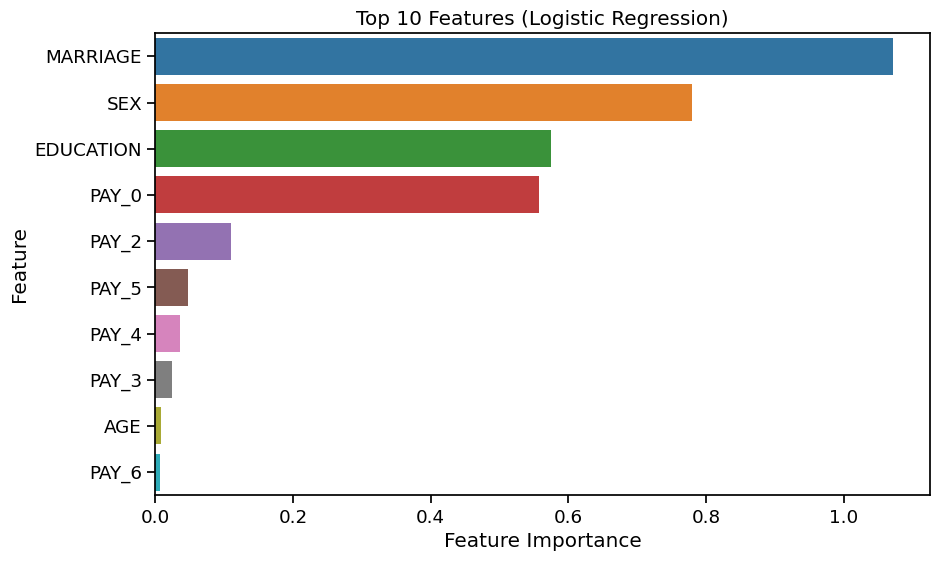

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Accuracy: 0.6771111111111111
ROC-AUC Score: 0.6763631290584416
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78      7040
           1       0.35      0.55      0.42      1960

    accuracy                           0.68      9000
   macro avg       0.60      0.63      0.60      9000
weighted avg       0.74      0.68      0.70      9000



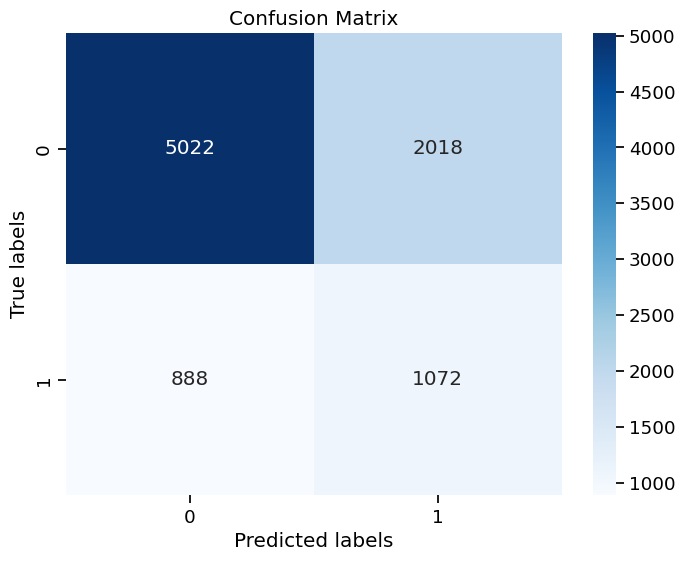

C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\spide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\spide\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge',

Average 5-Fold CV ROC-AUC Score: 0.7218
Standard Deviation: 0.0148


In [51]:
def train_with_top_features_and_visualize(model, X_train, y_train, X_test, num_top_features=10):
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).flatten()
    else:
        raise AttributeError("Model does not have feature_importances_ or coef_ attribute")
    
    indices = np.argsort(importances)[-num_top_features:]
    
    top_features = X_train.columns[indices]
    top_importances = importances[indices]
    
    sorted_indices = np.argsort(top_importances)[::-1]
    top_features = top_features[sorted_indices]
    top_importances = top_importances[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {num_top_features} Features')
    plt.show()
    
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]
    
    model.fit(X_train_top, y_train)
    return model, X_test_top

num_top_features = 10

print("Random Forest:")
best_rf, X1_test_rf_top = train_with_top_features_and_visualize(best_rf, X1_train_smote, y1_train_smote, X1_test, num_top_features)
evaluate_model(best_rf, X1_test_rf_top, y1_test)

print("XGBoost:")
best_xgb, X1_test_xgb_top = train_with_top_features_and_visualize(best_xgb, X1_train_smote, y1_train_smote, X1_test, num_top_features)
evaluate_model(best_xgb, X1_test_xgb_top, y1_test)

print("CatBoost:")
best_cat, X1_test_cat_top = train_with_top_features_and_visualize(best_cat, X1_train_smote, y1_train_smote, X1_test, num_top_features)
evaluate_model(best_cat, X1_test_cat_top, y1_test)

print("LightGBM:")
best_lgb, X1_test_lgb_top = train_with_top_features_and_visualize(best_lgb, X1_train_smote, y1_train_smote, X1_test, num_top_features)
evaluate_model(best_lgb, X1_test_lgb_top, y1_test)

def train_log_reg_with_top_features_and_visualize(model, X_train, y_train, X_test, num_top_features=10):
    model.fit(X_train, y_train)
    importances = np.abs(model.coef_).flatten()
    
    indices = np.argsort(importances)[-num_top_features:]
    
    top_features = X_train.columns[indices]
    top_importances = importances[indices]
    
    sorted_indices = np.argsort(top_importances)[::-1]
    top_features = top_features[sorted_indices]
    top_importances = top_importances[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {num_top_features} Features (Logistic Regression)')
    plt.show()
    
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]
    
    model.fit(X_train_top, y_train)
    return model, X_test_top

print("Logistic Regression:")
best_lr, X1_test_lr_top = train_log_reg_with_top_features_and_visualize(best_lr, X1_train_smote, y1_train_smote, X1_test, num_top_features)
evaluate_model(best_lr, X1_test_lr_top, y1_test)